<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Bonheur World <mark>Exploration des données et nettoyage</mark>
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Mission 
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.1. Rappel sur sujet
</div>

Challenge goals

How accurately can we predict regional temperature anomalies based on past and neighbouring climate observations ?

Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique non supervisé pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité. Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).         

- Un notebook contenant les fonctions permettant le prétraitement des données ainsi que les résultats du clustering (en y incluant des représentations graphiques) ....
- Un support de présentation qui présente la démarche et les résultats du clustering.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Description du notebook
</div>

Ce note book, a pour objectif d'explorer les données et d'effectuer le nettoyage.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.3. Description des données
</div>



|column        | Description                             |
|--------------| --------------------------------------- |
|country_official | nom officiel du pays |
|country | nom du pays reçu à l'origine|
|year | année|
|score | score du bonheur|
|PIB | PIB par habitant|
|Soutien | Soutien social|
|Esperance vie BS | Espérance de vie en Bonne Santé|
|Liberte des choix de vie | |
|Generosite | la générosité perçue|
|Corruption | le faible niveau de corruption perçue|
|Regional indicator||
|id_country | identifiant officiel du pays|
|alpha3 | code alpha3 officiel du pays|
|alpha2 | code alpha2 officiel du pays|
|continent_code | code continent officiel du pays|
|latitude | latitude du pays|
|longitude | longitude du pay|s
|Annual Sunshine | durée d'ensoleillement du pays|
|Annual Sunshine NCDC Computed||
|deaths_rural_urban | nombre de morts en zone urbaine|
|divorces | nombre de divorce|
|Precipitations in million cubic metres | volume de précipitations|
|rate of Population connected to wastewater collecting system | ratio de la population avec l'eau courante|
|rate of Population connected to wastewater treatment | ratio de la population connectée au tout à l'égout|
|gini | indice de gini|
|intentional homicide victims Female nb | nombre de femmes victimes d'homicide |
|intentional homicide victims Male nb | nombre d'hommes victimes d'homicide |
|Homicide victime nb | nombre de victimes d'homicide |


In [1]:
from os import getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm
import csv
from bonheur_bed_ara import *
from IPython.core.display import HTML
import plotly.express as px
import plotly.graph_objs as go

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 0

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"
country_col_name = "country"
country_official_col_name = "country_official"
country_official_France = 'French Republic'

data_set_file_name = "DATA_SET_FULL.csv"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\dataset\


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Chargement
</div>

Le code continent `NA` pour `North America` est interprété comme un NAN, il faut donc en tenir compte au chargement des données.

In [3]:
# Le code continent North American = NA était interprété en tant que NaN et non sa valeur
df_origin = pd.read_csv(data_set_path+data_set_file_name, quoting=csv.QUOTE_NONNUMERIC, na_values=["", np.nan], keep_default_na=False, sep=',')
df_origin = df_origin.sort_values(by=[country_official_col_name, "year"])

print(f"{df_origin.shape} données chargées ------> {list(df_origin.columns)}")
df_origin.head()

(2359, 28) données chargées ------> ['country_official', 'country', 'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS', 'Liberte des choix de vie', 'Generosite', 'Corruption', 'Regional indicator', 'id_country', 'alpha3', 'alpha2', 'continent_code', 'latitude', 'longitude', 'Annual Sunshine', 'Annual Sunshine NCDC Computed', 'deaths_rural_urban', 'divorces', 'Precipitations in million cubic metres', 'rate of Population connected to wastewater collecting system', 'rate of Population connected to wastewater treatment', 'gini', 'intentional homicide victims Female nb', 'intentional homicide victims Male nb', 'Homicide victime nb']


country_official country    year  score    PIB  Soutien  \
443   Arab Republic of Egypt   Egypt  2005.0  5.168  9.036    0.848   
828   Arab Republic of Egypt   Egypt  2007.0  5.541  9.135    0.686   
1082  Arab Republic of Egypt   Egypt  2008.0  4.632  9.186    0.738   
936   Arab Republic of Egypt   Egypt  2009.0  5.066  9.213    0.744   
961   Arab Republic of Egypt   Egypt  2010.0  4.669  9.244    0.769   

      Esperance vie BS  Liberte des choix de vie  Generosite  Corruption  ...  \
443              59.70                     0.817         NaN         NaN  ...   
828              59.82                     0.609      -0.121         NaN  ...   
1082             59.88                       NaN      -0.087       0.914  ...   
936              59.94                     0.611      -0.100       0.801  ...   
961              60.00                     0.486      -0.076       0.826  ...   

     Annual Sunshine NCDC Computed  deaths_rural_urban  divorces  \
443                         3293.3            450646.0   65047.0   
828                         3790.8            450596.0   77878.0   
1082                        3790.8            461934.0   84430.0   
936                         3298.9            476592.0  141467.0   
961                         3666.4            483385.0  149376.0   

     Precipitations in million cubic metres  \
443                                  1300.0   
828                                  1300.0   
1082                                    NaN   
936                                     NaN   
961                                     NaN   

     rate of Population connected to wastewater collecting system  \
443                                                 NaN             
828                                                 NaN             
1082                                                NaN             
936                                                 NaN             
961                                                 NaN             

      rate of Population connected to wastewater treatment  gini  \
443                                                 NaN      NaN   
828                                                 NaN      NaN   
1082                                                NaN      NaN   
936                                                 NaN      NaN   
961                                                 NaN      NaN   

      intentional homicide victims Female nb  \
443                                     63.0   
828                                    163.0   
1082                                   110.0   
936                                    193.0   
961                                    197.0   

      intentional homicide victims Male nb  Homicide victime nb  
443                                  459.0              10962.0  
828                                  517.0              14280.0  
1082                                 856.0              20286.0  
936                                  719.0              19152.0  
961                                 1642.0              38619.0  

[5 rows x 28 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Exploration de la forme
</div>

In [4]:
df_origin[df_origin['continent_code'].isna()]

Empty DataFrame
Columns: [country_official, country, year, score, PIB, Soutien, Esperance vie BS, Liberte des choix de vie, Generosite, Corruption, Regional indicator, id_country, alpha3, alpha2, continent_code, latitude, longitude, Annual Sunshine, Annual Sunshine NCDC Computed, deaths_rural_urban, divorces, Precipitations in million cubic metres, rate of Population connected to wastewater collecting system, rate of Population connected to wastewater treatment, gini, intentional homicide victims Female nb, intentional homicide victims Male nb, Homicide victime nb]
Index: []

[0 rows x 28 columns]

In [5]:
df = df_origin.copy()

In [6]:
df.duplicated(subset=['country_official', 'year']).sum()

0

<div style="display: flex; background-color: indigo;" >

#### Encodage des continents
</div>

In [7]:
# Encodage des continents :
from sklearn.preprocessing import LabelEncoder

In [8]:
transformer_continent = LabelEncoder()
df['continent_encode'] = transformer_continent.fit_transform(df['continent_code'])
df = df[['country_official', 'country', 'continent_code','continent_encode','year', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite',
       'Corruption', 'Regional indicator', 'alpha3', 'alpha2', 'latitude', 'longitude', 'id_country', 'Annual Sunshine',
       'Annual Sunshine NCDC Computed', 'deaths_rural_urban', 'divorces',
       'Precipitations in million cubic metres',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'intentional homicide victims Female nb',
       'intentional homicide victims Male nb', 'Homicide victime nb'
       ]]

<div style="display: flex; background-color: indigo;" >

#### Typage des données
</div>

In [9]:
df["year"] = df["year"].astype(int)
df["id_country"] = df["id_country"].astype(int)

In [10]:
df.dtypes

country_official                                                 object
country                                                          object
continent_code                                                   object
continent_encode                                                  int32
year                                                              int32
score                                                           float64
PIB                                                             float64
Soutien                                                         float64
Esperance vie BS                                                float64
Liberte des choix de vie                                        float64
Generosite                                                      float64
Corruption                                                      float64
Regional indicator                                               object
alpha3                                                          

In [11]:
annee_min = df["year"].min()
annee_max = df["year"].max()
print(f"Données de {annee_min} à {annee_max}")

Données de 2005 à 2022


<div style="display: flex; background-color: indigo;" >

#### Correction des données du la Suède
</div>

Suite à la l'analyse de l'évolution des scores pour le top des pays, on constate une anomalie dans les données de la Suède.

In [12]:
country_name = "Kingdom of Sweden"
df[(df['country_official']==country_name) & ((df['year']==2020) | (df['year']==2021))]

country_official    country continent_code  continent_encode  year  \
953   Kingdom of Sweden  Swaziland             EU                 2  2020   
1694  Kingdom of Sweden  Swaziland             EU                 2  2021   

      score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
953   4.308  9.163     0.77            51.188                     0.647  ...   
1694  4.308  9.065     0.77            50.833                     0.647  ...   

      Annual Sunshine NCDC Computed  deaths_rural_urban divorces  \
953                          1801.0             98124.0      NaN   
1694                         1803.0                 NaN      NaN   

     Precipitations in million cubic metres  \
953                                     NaN   
1694                                    NaN   

     rate of Population connected to wastewater collecting system  \
953                                                 NaN             
1694                                                NaN             

      rate of Population connected to wastewater treatment  gini  \
953                                                 NaN      NaN   
1694                                                NaN      NaN   

      intentional homicide victims Female nb  \
953                                     25.0   
1694                                     NaN   

      intentional homicide victims Male nb  Homicide victime nb  
953                                   99.0               2604.0  
1694                                   NaN                  NaN  

[2 rows x 29 columns]

In [13]:
# Correction de la valeur de la Suède
# Pour 2020 = récupération du score sur internet
df.loc[(df['country_official']==country_name) & (df['year']==2020), 'score'] = 7.353
# Pour 2021 = La moyenne entre 2020 et 2022
df.loc[(df['country_official']==country_name) & (df['year']==2021), 'score'] = np.mean(df.loc[(df['country_official']==country_name) & ((df['year']==2020) | (df['year']==2022)), 'score'].values)
df[(df['country_official']==country_name) & ((df['year']==2020) | (df['year']==2021))]

country_official    country continent_code  continent_encode  year  \
953   Kingdom of Sweden  Swaziland             EU                 2  2020   
1694  Kingdom of Sweden  Swaziland             EU                 2  2021   

       score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
953   7.3530  9.163     0.77            51.188                     0.647  ...   
1694  7.3685  9.065     0.77            50.833                     0.647  ...   

      Annual Sunshine NCDC Computed  deaths_rural_urban divorces  \
953                          1801.0             98124.0      NaN   
1694                         1803.0                 NaN      NaN   

     Precipitations in million cubic metres  \
953                                     NaN   
1694                                    NaN   

     rate of Population connected to wastewater collecting system  \
953                                                 NaN             
1694                                                NaN             

      rate of Population connected to wastewater treatment  gini  \
953                                                 NaN      NaN   
1694                                                NaN      NaN   

      intentional homicide victims Female nb  \
953                                     25.0   
1694                                     NaN   

      intentional homicide victims Male nb  Homicide victime nb  
953                                   99.0               2604.0  
1694                                   NaN                  NaN  

[2 rows x 29 columns]

<div style="display: flex; background-color: indigo;" >

#### Correction des données 2022
</div>

Après une première analyse suite à la visualisation des outliers, les données complémentaires de 2022 ont changées, il ne s'agit pas de la valeur, mais du ratio d'impact de la variable sur le score, nous ne disposons donc pas des valeurs pour l'année 2022.

Suppression des valeurs complémentaires pour l'année 2022, à savoir les variables `'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption'`

On applique cette correction dès le départ, car il y a un impact sur les analyses qui suivent

In [14]:
to_correct_colums = ['PIB', 'Soutien', 'Esperance vie BS', 'Liberte des choix de vie', 'Generosite', 'Corruption']
for c in to_correct_colums:
    df.loc[df["year"] == 2022, c] = np.nan

df.head()

country_official country continent_code  continent_encode  year  \
443   Arab Republic of Egypt   Egypt             AF                 0  2005   
828   Arab Republic of Egypt   Egypt             AF                 0  2007   
1082  Arab Republic of Egypt   Egypt             AF                 0  2008   
936   Arab Republic of Egypt   Egypt             AF                 0  2009   
961   Arab Republic of Egypt   Egypt             AF                 0  2010   

      score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
443   5.168  9.036    0.848             59.70                     0.817  ...   
828   5.541  9.135    0.686             59.82                     0.609  ...   
1082  4.632  9.186    0.738             59.88                       NaN  ...   
936   5.066  9.213    0.744             59.94                     0.611  ...   
961   4.669  9.244    0.769             60.00                     0.486  ...   

      Annual Sunshine NCDC Computed  deaths_rural_urban  divorces  \
443                          3293.3            450646.0   65047.0   
828                          3790.8            450596.0   77878.0   
1082                         3790.8            461934.0   84430.0   
936                          3298.9            476592.0  141467.0   
961                          3666.4            483385.0  149376.0   

     Precipitations in million cubic metres  \
443                                  1300.0   
828                                  1300.0   
1082                                    NaN   
936                                     NaN   
961                                     NaN   

     rate of Population connected to wastewater collecting system  \
443                                                 NaN             
828                                                 NaN             
1082                                                NaN             
936                                                 NaN             
961                                                 NaN             

      rate of Population connected to wastewater treatment  gini  \
443                                                 NaN      NaN   
828                                                 NaN      NaN   
1082                                                NaN      NaN   
936                                                 NaN      NaN   
961                                                 NaN      NaN   

      intentional homicide victims Female nb  \
443                                     63.0   
828                                    163.0   
1082                                   110.0   
936                                    193.0   
961                                    197.0   

      intentional homicide victims Male nb  Homicide victime nb  
443                                  459.0              10962.0  
828                                  517.0              14280.0  
1082                                 856.0              20286.0  
936                                  719.0              19152.0  
961                                 1642.0              38619.0  

[5 rows x 29 columns]

<div style="display: flex; background-color: indigo;" >

#### Correction des données Mali ensoleillement 2021
</div>

Suite à l'analyse des outliers, il s'avère que la donnée "Ensoleillement" pour le Mali pour l'année 2021 est erronée.

Choix de l'imputation par la moyenne de l'année précédente et suivante.

In [15]:
# L'une des valeurs du Mali n'est pas cohérente pour l'ensoleillement, pour l'année 2021 : 298.7 alors que toutes les autres années sont autour entre 2800 et 3000
moyenne_20_22 = np.mean(df.loc[(df['country_official']=='Republic of Mali') & ((df['year']==2020) | (df['year']==2022)), 'Annual Sunshine NCDC Computed'].values)
df.loc[(df['country_official']=='Republic of Mali') & (df['year']==2021), 'Annual Sunshine NCDC Computed'] = moyenne_20_22
if verbose:
    print(f"MALI Sunshine > 2021 => {moyenne_20_22} ------------ IMPUTED")
df.loc[(df['country_official']=='Republic of Mali') & (df['year']==2021), 'Annual Sunshine NCDC Computed']

1892    2926.1
Name: Annual Sunshine NCDC Computed, dtype: float64

In [16]:
# Correction des données du Niger avec la moyenne des pays voisins sur la même latitude
for y in range(annee_min, annee_max+1):
    if verbose:
        print(f"NIGER Sunshine > {y} =", end="")
    moyenne_voisins = np.nan
    try:
        moyenne_voisins = np.mean(df.loc[((df['country_official']=='Republic of Mali') | (df['country_official']=='Republic of Chad')) & (df['year']==y), 'Annual Sunshine NCDC Computed'].values)
    except:
        moyenne_voisins = np.nan
    # On ne traite que les lignes déjà existantes
    if df[(df['country_official']=='Republic of the Niger') & (df['year']==y)].shape[0]>0:
        df.loc[(df['country_official']=='Republic of the Niger') & (df['year']==y), 'Annual Sunshine NCDC Computed' ] = moyenne_voisins
        if verbose:
            print(f"> {moyenne_voisins} ------------ IMPUTED")
    else:
        if verbose:
            print(f"> ------------ UNEXIST")
df[df['country_official']=='Republic of the Niger']

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


country_official country continent_code  continent_encode  year  \
1133  Republic of the Niger   Niger             AF                 0  2006   
1009  Republic of the Niger   Niger             AF                 0  2007   
1125  Republic of the Niger   Niger             AF                 0  2008   
1143  Republic of the Niger   Niger             AF                 0  2009   
1182  Republic of the Niger   Niger             AF                 0  2010   
991   Republic of the Niger   Niger             AF                 0  2011   
1214  Republic of the Niger   Niger             AF                 0  2012   
1289  Republic of the Niger   Niger             AF                 0  2013   
1144  Republic of the Niger   Niger             AF                 0  2014   
1287  Republic of the Niger   Niger             AF                 0  2015   
1379  Republic of the Niger   Niger             AF                 0  2016   
1292  Republic of the Niger   Niger             AF                 0  2017   
1314  Republic of the Niger   Niger             AF                 0  2018   
1511  Republic of the Niger   Niger             AF                 0  2019   
1457  Republic of the Niger   Niger             AF                 0  2020   
1493  Republic of the Niger   Niger             AF                 0  2021   
1478  Republic of the Niger   Niger             AF                 0  2022   

      score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
1133  3.737  6.888    0.677             46.36                     0.750  ...   
1009  4.277  6.881    0.726             47.12                     0.584  ...   
1125  4.236  6.918    0.607             47.88                     0.649  ...   
1143  4.267  6.898    0.771             48.64                     0.880  ...   
1182  4.101  6.941    0.655             49.40                     0.817  ...   
991   4.556  6.925    0.818             49.92                     0.780  ...   
1214  3.798  6.987    0.700             50.44                     0.734  ...   
1289  3.716  7.002    0.696             50.96                     0.825  ...   
1144  4.181  7.027    0.753             51.48                     0.688  ...   
1287  3.671  7.030    0.713             52.00                     0.728  ...   
1379  4.235  7.047    0.683             52.50                     0.702  ...   
1292  4.616  7.058    0.582             53.00                     0.684  ...   
1314  5.164  7.087    0.612             53.50                     0.791  ...   
1511  5.004  7.106    0.677             54.00                     0.831  ...   
1457  4.910  6.842    0.617             53.50                     0.760  ...   
1493  5.074  7.098    0.641             53.78                     0.806  ...   
1478  5.003    NaN      NaN               NaN                       NaN  ...   

      Annual Sunshine NCDC Computed  deaths_rural_urban divorces  \
1133                        3307.40                 NaN      NaN   
1009                        3500.90                 NaN      NaN   
1125                        3010.35                 NaN      NaN   
1143                        3303.70                 NaN      NaN   
1182                        3182.30                 NaN      NaN   
991                         2783.20                 NaN      NaN   
1214                        3172.20                 NaN      NaN   
1289                        2979.20                 NaN      NaN   
1144                        3303.70                 NaN      NaN   
1287                        2837.05                 NaN      NaN   
1379                        3105.00                 NaN      NaN   
1292                        2800.50                 NaN      NaN   
1314                        3307.40                 NaN      NaN   
1511                        2837.05                 NaN      NaN   
1457                        3182.30                 NaN      NaN   
1493                        3213.50                 NaN      NaN   
1478     

<div style="display: flex; background-color: indigo;" >

#### Correction des années d'ensoleillement manquantes
</div>

La première idée pour compléter les données était de faire la moyenne de l'année passée et suivante du même pays.

In [17]:
current_data_col_name = 'Annual Sunshine NCDC Computed'
before_na = df[current_data_col_name].isna().sum()
df[current_data_col_name] = df.apply(lambda x: get_year_data_mean(df, current_y=x["year"], current_country=x["country_official"], current_data_col_name=current_data_col_name, verbose=verbose), axis=1)
print(f"{before_na} NA before proceed and {df[current_data_col_name].isna().sum()} NA after proceed")

889 NA before proceed and 889 NA after proceed


Après analyse, les pays pour lesquels il manque des données (hors Niger traité précédement) n'ont pas de "trou" dans leurs données, soit la donnée est présente, soit elle est absente.

Pour compléter l'ensoleillement de manière automatique, l'idéal serait donc de récupérer les pays qui ont des données dont la latitude est la même par ordre de proximté en longitude également.

Ce qui permettrait de définir les pays voisins de chaque pays et donc de faire la moyenne d'ensoleillement des plus proches voisins.
Par manque de temps, ce traitement n'est pas réalisé.

<div style="display: flex; background-color: indigo;" >

#### Describe
</div>

In [18]:
df.describe(include="all")

country_official country continent_code  continent_encode  \
count                     2359    2359           2359       2359.000000   
unique                     164     190              6               NaN   
top     Arab Republic of Egypt   Egypt             AS               NaN   
freq                        17      17            707               NaN   
mean                       NaN     NaN            NaN          1.518016   
std                        NaN     NaN            NaN          1.384665   
min                        NaN     NaN            NaN          0.000000   
25%                        NaN     NaN            NaN          0.000000   
50%                        NaN     NaN            NaN          1.000000   
75%                        NaN     NaN            NaN          2.000000   
max                        NaN     NaN            NaN          5.000000   

               year        score          PIB      Soutien  Esperance vie BS  \
count   2359.000000  2359.000000  2120.000000  2129.000000       2097.000000   
unique          NaN          NaN          NaN          NaN               NaN   
top             NaN          NaN          NaN          NaN               NaN   
freq            NaN          NaN          NaN          NaN               NaN   
mean    2014.507842     5.444851     9.349861     0.811119         63.394495   
std        4.768411     1.122205     1.163141     0.119134          7.441898   
min     2005.000000     2.375000     6.493000     0.290000         32.300000   
25%     2011.000000     4.630000     8.445000     0.747000         58.640000   
50%     2015.000000     5.384000     9.456000     0.834000         65.200000   
75%     2019.000000     6.260000    10.339000     0.905000         68.520000   
max     2022.000000     8.019000    11.648000     0.987000         77.100000   

        Liberte des choix de vie  ...  Annual Sunshine NCDC Computed  \
count                2111.000000  ...                    1470.000000   
unique                       NaN  ...                            NaN   
top                          NaN  ...                            NaN   
freq                         NaN  ...                            NaN   
mean                    0.745412  ...                    2391.999354   
std                     0.140637  ...                     636.252758   
min                     0.258000  ...                     595.000000   
25%                     0.650000  ...                    1828.000000   
50%                     0.764000  ...                    2441.800000   
75%                     0.860000  ...                    2925.175000   
max                     0.985000  ...                    3862.800000   

        deaths_rural_urban      divorces  \
count         1.035000e+03  9.460000e+02   
unique                 NaN           NaN   
top                    NaN           NaN   
freq                   NaN           NaN   
mean          3.624518e+05  7.289547e+04   
std           1.180071e+06  2.678078e+05   
min           1.216000e+03  4.200000e+01   
25%           2.878850e+04  5.162250e+03   
50%           8.087600e+04  1.310950e+04   
75%           2.579000e+05  3.583625e+04   
max           9.980000e+06  4.393722e+06   

       Precipitations in million cubic metres  \
count                            5.340000e+02   
unique                                    NaN   
top                                       NaN   
freq                                      NaN   
mean                             7.909549e+05   
std                              2.366401e+06   
min                              1.540000e+01   
25%                              3.251570e+04   
50%                              1.010552e+05   
75%                              3.659614e+05   
max                              1.641840e+07   

       rate of Population connected to wastewater collecting system  \
count                                          461.000000             
unique                     

In [19]:
display(HTML(df[df["country_official"]==country_official_France].head().to_html()))

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Visualisation générale
</div>

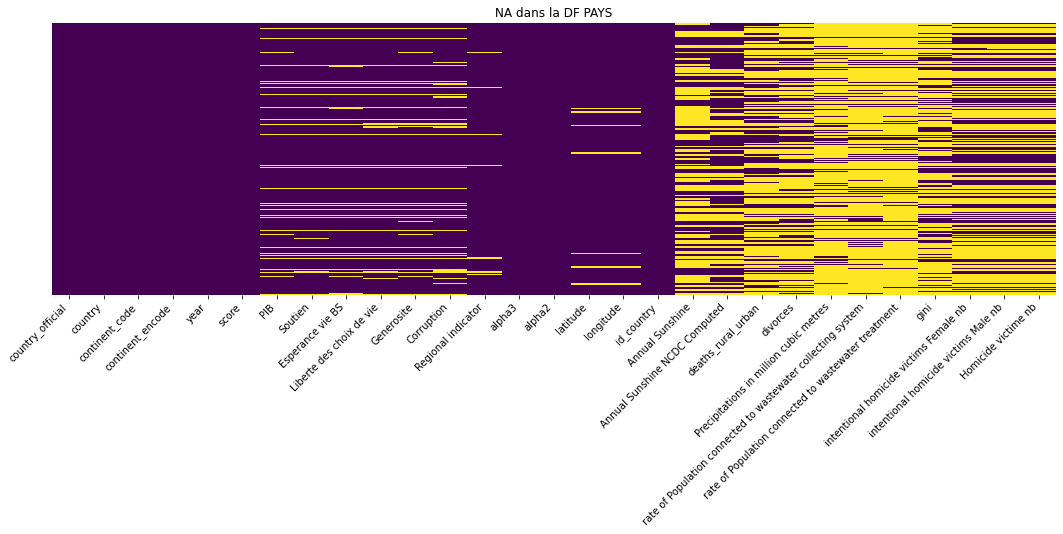

In [20]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF PAYS")
figure.set_size_inches(18, 5, forward=True)
plt.show()

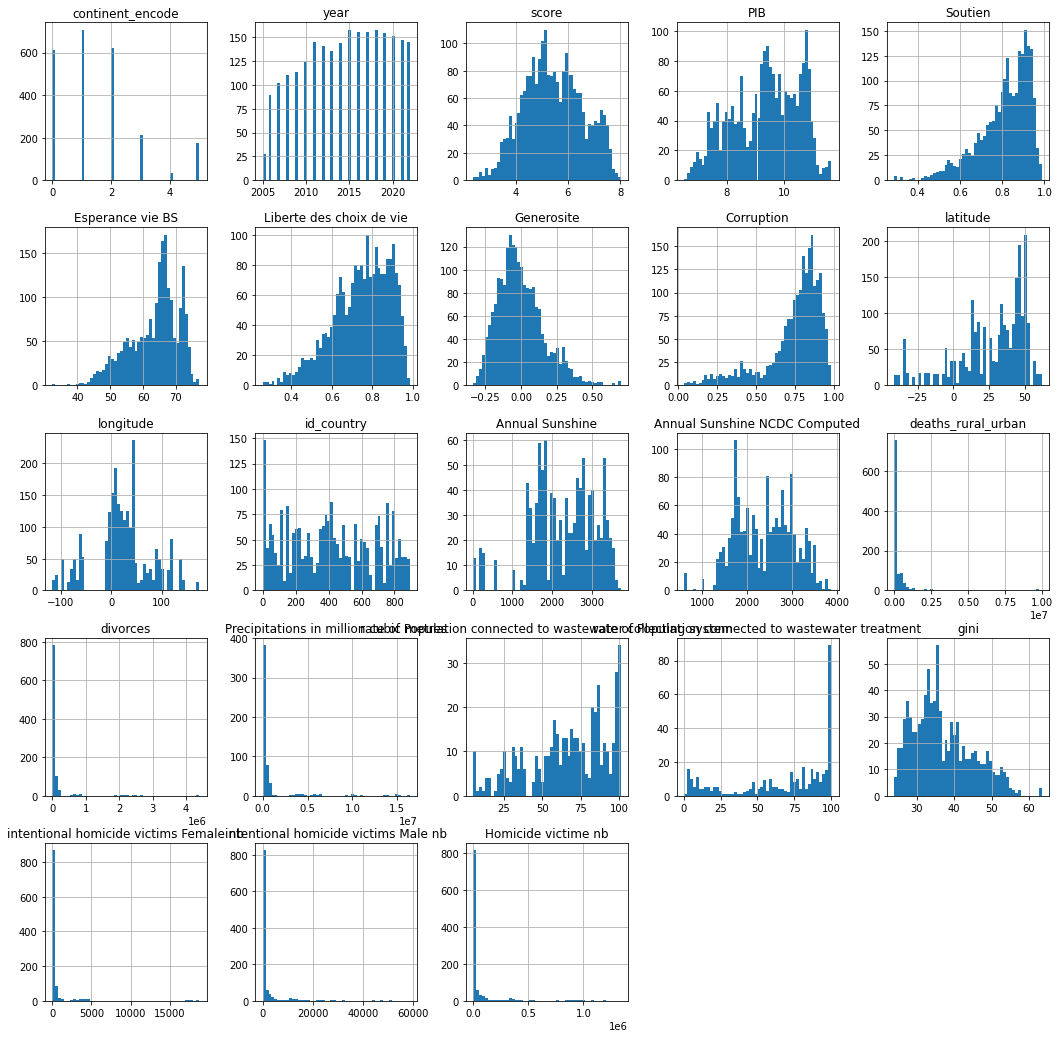

In [21]:
df.hist(figsize=(18,18),bins=50)
plt.show()

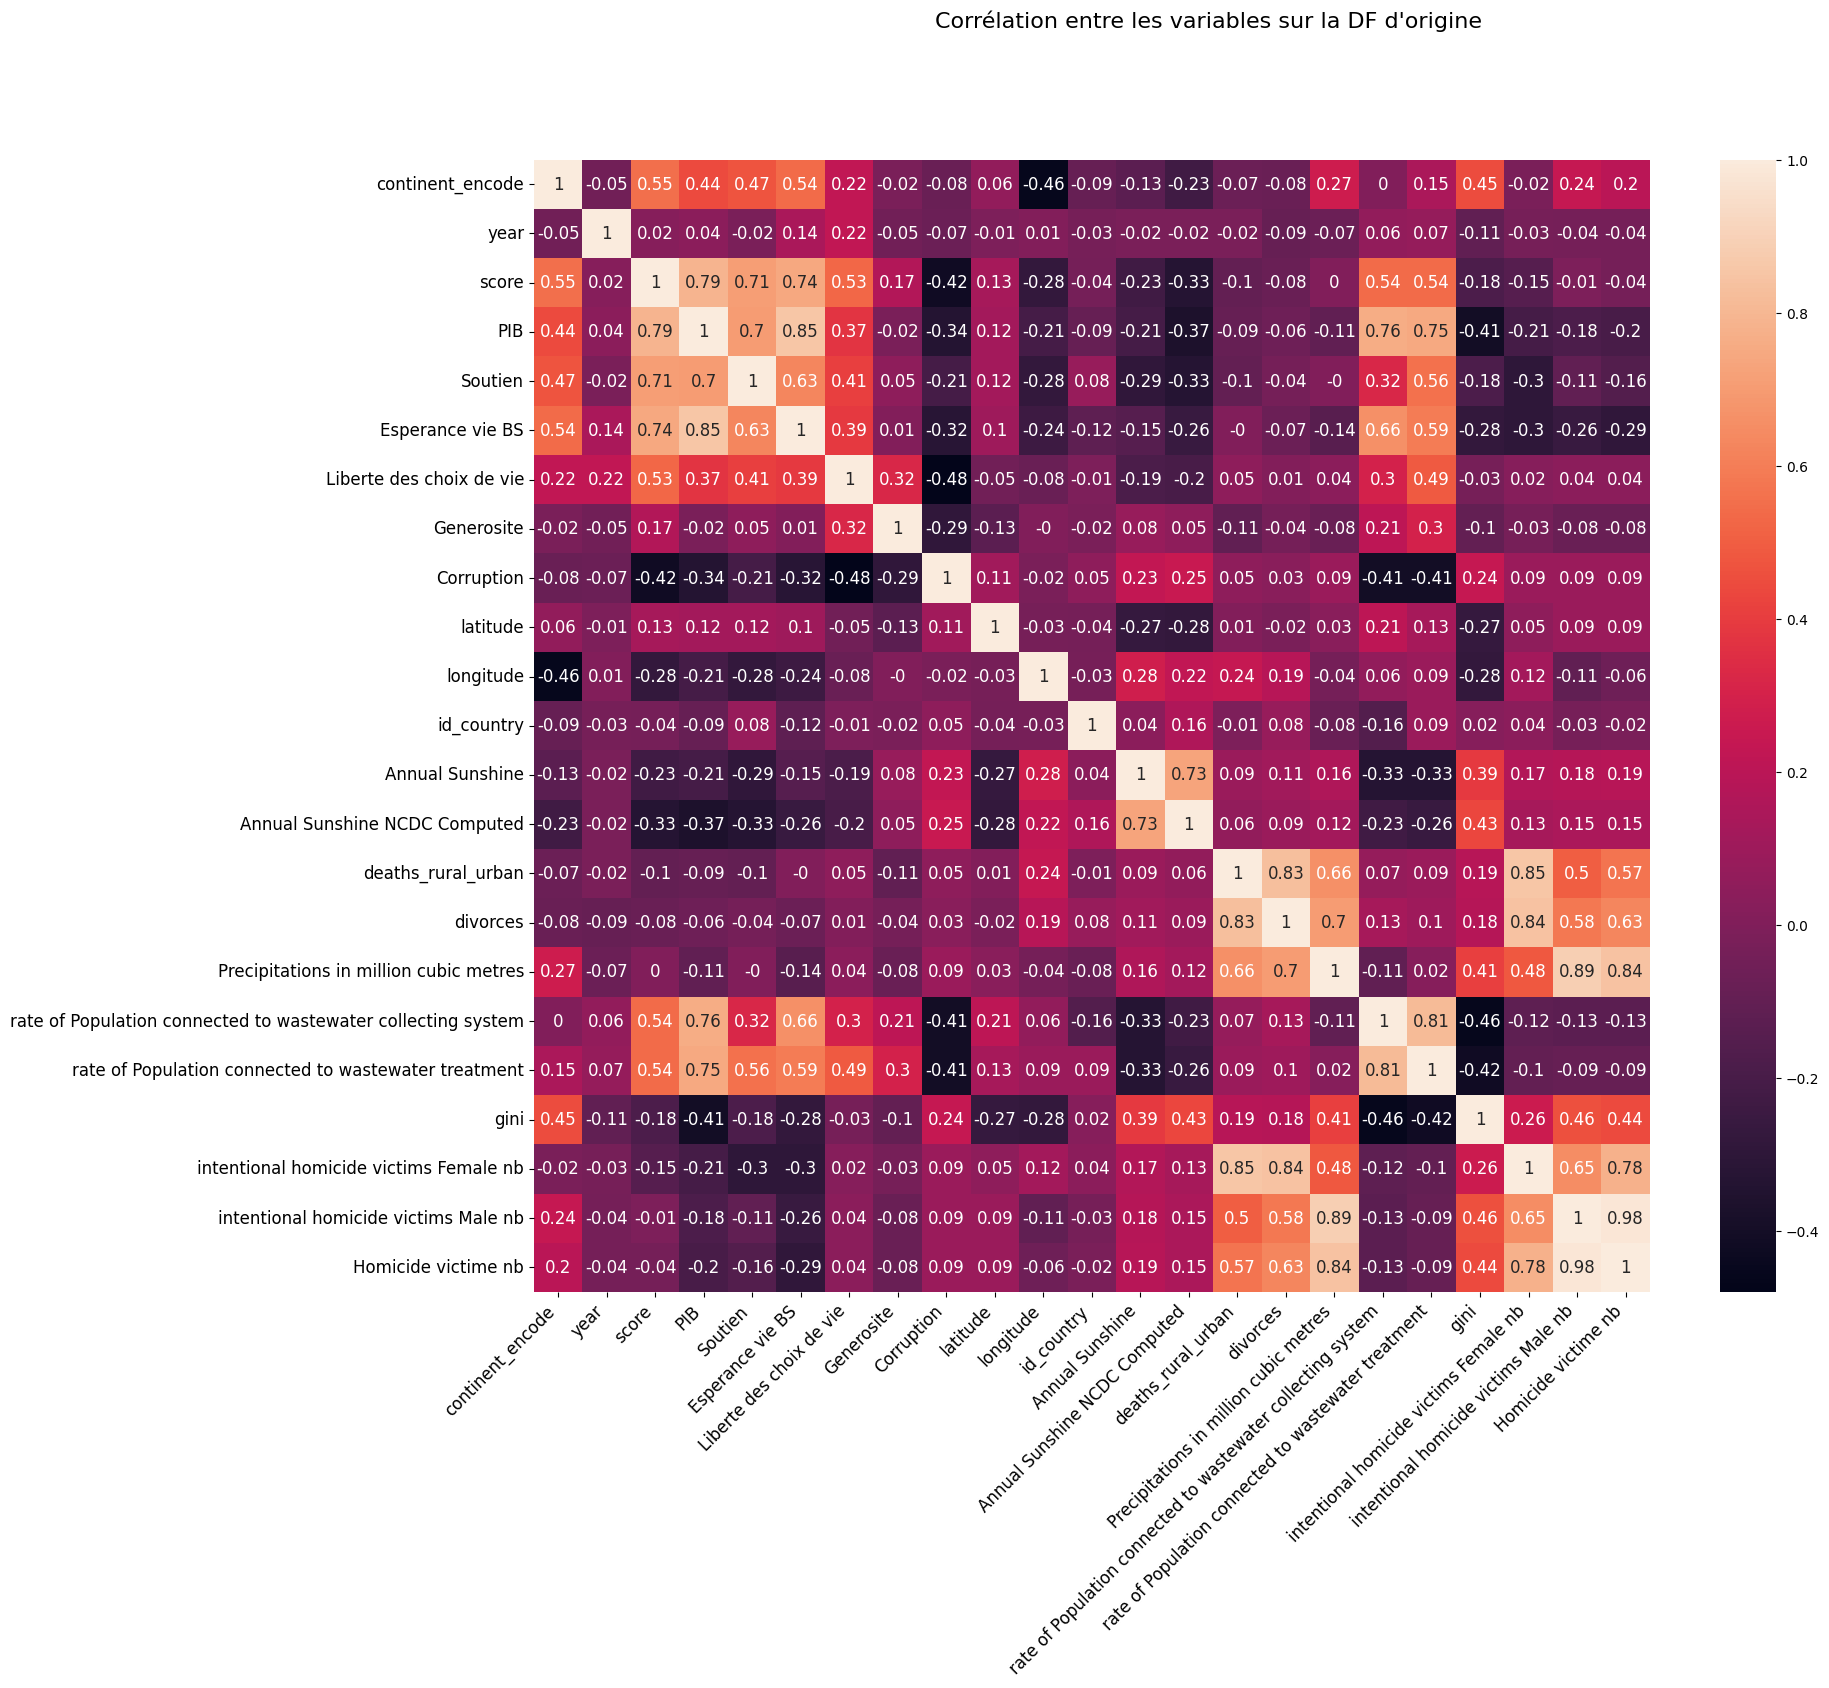

In [22]:
draw_correlation_graphe(df, "Corrélation entre les variables sur la DF d'origine", verbose=verbose,fontsize=12)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Suppression des variables trop corrélées
</div>

Suite a une première analyse, les variables : 
- `Annual Sunshine` et `Annual Sunshine NCDC Computed` sont très fortement corrélée (0.84), une seule de ces 2 variables est donc suffisantes, suppression de `Annual Sunshine`
- `intentional homicide victims Male nb` et `intentional homicide victims Female nb`, `Homicide victime nb` sont très fortement corrélée (0.98), une seule de ces 2 variables est donc suffisantes, suppression de `intentional homicide victims Male nb` et de `intentional homicide victims Female nb`

In [24]:
df_clean = df.copy()
df_clean = df_clean.drop(['Annual Sunshine', 'intentional homicide victims Male nb', 'intentional homicide victims Female nb'], axis=1)
# renommage des variables qui ont un nom trop long
df_clean = df_clean.rename(columns={'Annual Sunshine NCDC Computed' : 'Annual Sunshine',
                                    'Precipitations in million cubic metres':'Precipitations M. m3'
                                    })


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Complément des raccordements à l'eau et au traitement des eaux usées
</div>

Suite à une première analyse, on peut compléter les données sur les raccordements à l'eau et au traitement des eaux usées, en prenant comme hypothèse que la dernière année complétée permet de compléter les suivantes (hypothèse qu'il n'y a pas de diminution du nombre de personnes raccordées, mais au minimum un maintien sur les années suivantes quand il n'y a pas de valeur)

In [25]:
def complete_df_with_water_data(df_clean, verbose=0):
    col_names = ['rate of Population connected to wastewater collecting system', 'rate of Population connected to wastewater treatment']
    df_completed = df_clean.copy()

    i = 0

    for col_name in col_names:
        # Création de la DF temporaire avec la dernière valeur par pays
        df_temp_max = df_completed[df_completed[col_name].notna()]
        df_temp_max = df_temp_max.sort_values(by=["country_official","year"], ascending=False)
        df_temp_max = df_temp_max[[country_official_col_name, "year", col_name]]
        
        year_col_name = "year_max_"+str(i)
        df_temp_max = df_temp_max.rename(columns={"year": year_col_name, col_name : col_name+"_max"})
        # on ne garde que la dernière année
        df_temp_max = df_temp_max.drop_duplicates(subset=["country_official"], keep="first")

        # merge des 2 DF pour pouvoir compléter les données
        df_completed = df_completed.merge(df_temp_max, on=country_official_col_name, how="left", indicator=False)
        df_completed.loc[(df_completed[col_name].isna()) & (df_completed["year"]>df_completed[year_col_name]), col_name] = df_completed[col_name+"_max"]

        # Suppression des colonnes ajoutées
        df_completed = df_completed.drop(columns=[year_col_name, col_name+"_max"])
        # DF complétée
        if verbose:
            print(f"{col_name} : {df_clean[col_name].isna().sum()} NA BEFORE => {df_completed[col_name].isna().sum()} NA AFTER")
        i += 1
    return df_completed


In [26]:
df_completed = complete_df_with_water_data(df_clean, verbose=verbose)
df_completed.head()

country_official country continent_code  continent_encode  year  \
0  Arab Republic of Egypt   Egypt             AF                 0  2005   
1  Arab Republic of Egypt   Egypt             AF                 0  2007   
2  Arab Republic of Egypt   Egypt             AF                 0  2008   
3  Arab Republic of Egypt   Egypt             AF                 0  2009   
4  Arab Republic of Egypt   Egypt             AF                 0  2010   

   score    PIB  Soutien  Esperance vie BS  Liberte des choix de vie  ...  \
0  5.168  9.036    0.848             59.70                     0.817  ...   
1  5.541  9.135    0.686             59.82                     0.609  ...   
2  4.632  9.186    0.738             59.88                       NaN  ...   
3  5.066  9.213    0.744             59.94                     0.611  ...   
4  4.669  9.244    0.769             60.00                     0.486  ...   

    longitude  id_country Annual Sunshine deaths_rural_urban  divorces  \
0  119.525419         818          3293.3           450646.0   65047.0   
1  119.525419         818          3790.8           450596.0   77878.0   
2  119.525419         818          3790.8           461934.0   84430.0   
3  119.525419         818          3298.9           476592.0  141467.0   
4  119.525419         818          3666.4           483385.0  149376.0   

   Precipitations M. m3  \
0                1300.0   
1                1300.0   
2                   NaN   
3                   NaN   
4                   NaN   

   rate of Population connected to wastewater collecting system  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   rate of Population connected to wastewater treatment  gini  \
0                                                NaN      NaN   
1                                                NaN      NaN   
2                                                NaN      NaN   
3                                                NaN      NaN   
4                                                NaN      NaN   

   Homicide victime nb  
0              10962.0  
1              14280.0  
2              20286.0  
3              19152.0  
4              38619.0  

[5 rows x 26 columns]

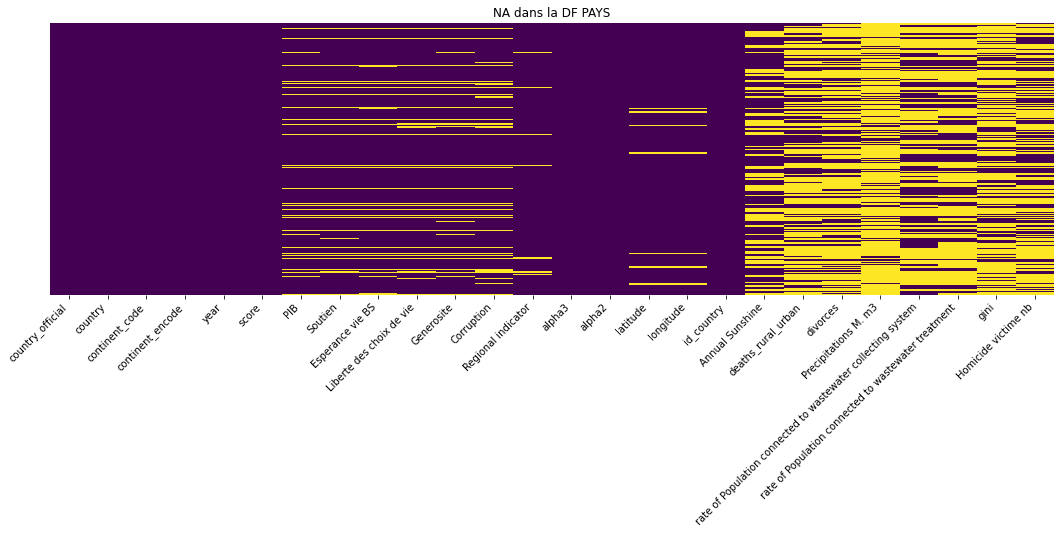

In [27]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_completed.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF PAYS")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.5. Création de la DF avec les moyennes par pays
</div>

In [28]:
group_cols = ['country_official', 'continent_code', 'alpha3', 'alpha2', 'latitude', 'longitude']
un_means_col = ['continent_encode', 'year', 'latitude', 'longitude', 'id_country']

mean_cols1 = get_numeric_columns_names(df_completed, verbose=verbose)
mean_cols = [c for c in mean_cols1 if c not in un_means_col]

if verbose:
   print(f"mean_cols : {mean_cols}")

mean_dic = {}
for c in mean_cols:
   if c not in group_cols:
      mean_dic[c] = ['mean']

if verbose:
   print(f"group_cols : {group_cols}")
   
df_mean = df_completed.groupby(group_cols, as_index=False).agg(mean_dic)
df_mean = df_mean.droplevel(1, axis=1) 
df_mean = df_mean.sort_values(by=['score'], ascending=False)
df_mean = df_mean.reset_index()
df_mean = df_mean.drop("index", axis=1)
print(df_mean.shape)
df_mean.head()

(156, 21)


country_official continent_code alpha3 alpha2   latitude   longitude  \
0   Kingdom of Denmark             EU    DNK     DK   1.288895  103.846500   
1  Republic of Finland             EU    FIN     FI  61.924110   25.748151   
2  Swiss Confederation             EU    CHE     CH  46.978735    8.637402   
3    Kingdom of Norway             EU    NOR     NO  52.650280   -7.249520   
4  Republic of Iceland             EU    ISL     IS -27.148133 -109.334378   

      score        PIB   Soutien  Esperance vie BS  ...  Generosite  \
0  7.681941  10.874063  0.957500         71.227688  ...    0.162467   
1  7.623067  10.743786  0.948786         71.224357  ...   -0.000071   
2  7.551500  11.088182  0.943182         73.376545  ...    0.114455   
3  7.506583  11.044545  0.950455         72.709182  ...    0.137636   
4  7.464273  10.856889  0.977222         72.880000  ...    0.256750   

   Corruption  Annual Sunshine  deaths_rural_urban      divorces  \
0    0.196250      1671.882353        53701.600000  15467.266667   
1    0.246714      1636.460000        51914.000000  13375.166667   
2    0.306818      1694.200000        66147.400000  17414.200000   
3    0.336727       595.000000        40963.700000  10144.000000   
4    0.705444      1106.400000         2183.444444    549.000000   

   Precipitations M. m3  \
0          32412.250000   
1         237160.833333   
2          59760.400000   
3         393671.000000   
4         168764.666667   

   rate of Population connected to wastewater collecting system  \
0                                          90.800000              
1                                          83.000000              
2                                                NaN              
3                                          85.658331              
4                                          92.000000              

   rate of Population connected to wastewater treatment       gini  \
0                                         100.014285     27.369231   
1                                         100.000000     27.372727   
2                                                NaN     32.750000   
3                                          98.175001     27.062500   
4                                         100.000000     27.350000   

   Homicide victime nb  
0              1142.40  
1              2000.25  
2              1020.60  
3               600.60  
4                47.25  

[5 rows x 21 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.7. TOP et FLOP
</div>

On extrait le top et le flop pour la suite des analyses

In [29]:
# Constitution du top 30 et du flop 20
top_30 = df_mean.head(30)
top_30.head()

country_official continent_code alpha3 alpha2   latitude   longitude  \
0   Kingdom of Denmark             EU    DNK     DK   1.288895  103.846500   
1  Republic of Finland             EU    FIN     FI  61.924110   25.748151   
2  Swiss Confederation             EU    CHE     CH  46.978735    8.637402   
3    Kingdom of Norway             EU    NOR     NO  52.650280   -7.249520   
4  Republic of Iceland             EU    ISL     IS -27.148133 -109.334378   

      score        PIB   Soutien  Esperance vie BS  ...  Generosite  \
0  7.681941  10.874063  0.957500         71.227688  ...    0.162467   
1  7.623067  10.743786  0.948786         71.224357  ...   -0.000071   
2  7.551500  11.088182  0.943182         73.376545  ...    0.114455   
3  7.506583  11.044545  0.950455         72.709182  ...    0.137636   
4  7.464273  10.856889  0.977222         72.880000  ...    0.256750   

   Corruption  Annual Sunshine  deaths_rural_urban      divorces  \
0    0.196250      1671.882353        53701.600000  15467.266667   
1    0.246714      1636.460000        51914.000000  13375.166667   
2    0.306818      1694.200000        66147.400000  17414.200000   
3    0.336727       595.000000        40963.700000  10144.000000   
4    0.705444      1106.400000         2183.444444    549.000000   

   Precipitations M. m3  \
0          32412.250000   
1         237160.833333   
2          59760.400000   
3         393671.000000   
4         168764.666667   

   rate of Population connected to wastewater collecting system  \
0                                          90.800000              
1                                          83.000000              
2                                                NaN              
3                                          85.658331              
4                                          92.000000              

   rate of Population connected to wastewater treatment       gini  \
0                                         100.014285     27.369231   
1                                         100.000000     27.372727   
2                                                NaN     32.750000   
3                                          98.175001     27.062500   
4                                         100.000000     27.350000   

   Homicide victime nb  
0              1142.40  
1              2000.25  
2              1020.60  
3               600.60  
4                47.25  

[5 rows x 21 columns]

In [30]:
flop_30 = df_mean.tail(30)
flop_30.tail()

country_official continent_code alpha3 alpha2   latitude  \
151                Rwandese Republic             AF    RWA     RW  -7.239409   
152              Republic of Burundi             AF    BDI     BI  36.761879   
153         Central African Republic             AF    CAF     CF  22.601014   
154  Islamic Republic of Afghanistan             AS    AFG     AF  29.276770   
155          Republic of South Sudan             AF    SDS     SS  22.594127   

      longitude     score       PIB   Soutien  Esperance vie BS  ...  \
151  112.625986  3.589867  7.477786  0.609000         58.109929  ...   
152    3.025798  3.434727  6.677143  0.438429         51.625714  ...   
153   88.418865  3.432778  6.905000  0.388500         43.663333  ...   
154   42.274721  3.375333  7.640571  0.502429         52.305929  ...   
155   88.412452  3.218857  7.425000  0.554600         50.528000  ...   

     Generosite  Corruption  Annual Sunshine  deaths_rural_urban  divorces  \
151    0.019385    0.184500              NaN                 NaN       NaN   
152   -0.032143    0.696571              NaN                 NaN       NaN   
153    0.036167    0.850333              NaN                 NaN       NaN   
154    0.045929    0.855571              NaN                 NaN       NaN   
155    0.017000    0.752200              NaN                 NaN       NaN   

     Precipitations M. m3  \
151          32428.665039   
152                   NaN   
153         900370.125000   
154                   NaN   
155                   NaN   

     rate of Population connected to wastewater collecting system  \
151                                                NaN              
152                                                NaN              
153                                                NaN              
154                                                NaN              
155                                                NaN              

     rate of Population connected to wastewater treatment  gini  \
151                                                NaN     44.4   
152                                           4.444444      NaN   
153                                                NaN      NaN   
154                                                NaN      NaN   
155                                                NaN     44.1   

     Homicide victime nb  
151                  NaN  
152             11620.00  
153                  NaN  
154             55560.75  
155                  NaN  

[5 rows x 21 columns]

In [31]:
df_completed = process_one_hot(df_completed, col="continent_code", verbose=verbose)
df_completed

country_official                  country continent_code  \
0     Arab Republic of Egypt                    Egypt             AF   
1     Arab Republic of Egypt                    Egypt             AF   
2     Arab Republic of Egypt                    Egypt             AF   
3     Arab Republic of Egypt                    Egypt             AF   
4     Arab Republic of Egypt                    Egypt             AF   
...                      ...                      ...            ...   
2354  the State of Palestine  Palestinian Territories             AS   
2355  the State of Palestine  Palestinian Territories             AS   
2356  the State of Palestine  Palestinian Territories             AS   
2357  the State of Palestine  Palestinian Territories             AS   
2358  the State of Palestine  Palestinian Territories             AS   

      continent_encode  year  score    PIB  Soutien  Esperance vie BS  \
0                    0  2005  5.168  9.036    0.848             59.70   
1                    0  2007  5.541  9.135    0.686             59.82   
2                    0  2008  4.632  9.186    0.738             59.88   
3                    0  2009  5.066  9.213    0.744             59.94   
4                    0  2010  4.669  9.244    0.769             60.00   
...                ...   ...    ...    ...      ...               ...   
2354                 1  2018  4.554    NaN    0.819               NaN   
2355                 1  2019  4.483    NaN    0.833               NaN   
2356                 1  2020  4.553  8.389    0.825             62.25   
2357                 1  2021  4.517  8.485    0.826             62.25   
2358                 1  2022  4.483    NaN      NaN               NaN   

      Liberte des choix de vie  ...  \
0                        0.817  ...   
1                        0.609  ...   
2                          NaN  ...   
3                        0.611  ...   
4                        0.486  ...   
...                        ...  ...   
2354                     0.655  ...   
2355                     0.653  ...   
2356                     0.646  ...   
2357                     0.653  ...   
2358                       NaN  ...   

      rate of Population connected to wastewater collecting system  \
0                                                   NaN              
1                                                   NaN              
2                                                   NaN              
3                                                   NaN              
4                                                   NaN              
...                                                 ...              
2354                                          53.900002              
2355                                          53.900002              
2356                                          53.900002              
2357                                          53.900002              
2358                                          53.900002              

      rate of Population connected to wastewater treatment gini  \
0                                                   NaN     NaN   
1                                                   NaN     NaN   
2                                                   NaN     NaN   
3                                                   NaN     NaN   
4                                                   NaN     NaN   
...                                                 ...     ...   
2354                                                NaN     NaN   
2355                                                NaN     NaN   
2356                                                NaN     NaN   
2357                                                NaN     NaN   
2358                                                NaN     NaN   

     Homicide victime nb continent_code_AF  continent_code_AS  \
0                10962.0               1.0                0.0   
1                14280.0 

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 3.Exploration des données
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.1. Exploration générale
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.1.1. Visualisation des outliers
</div>

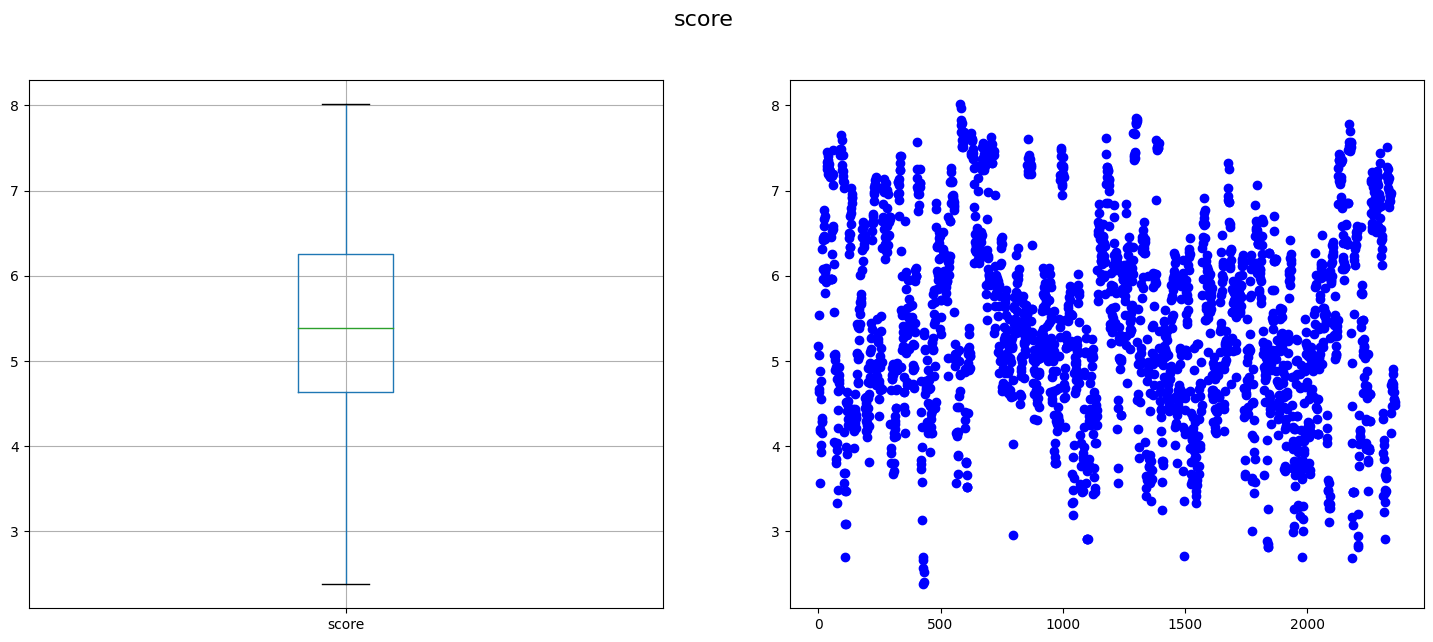

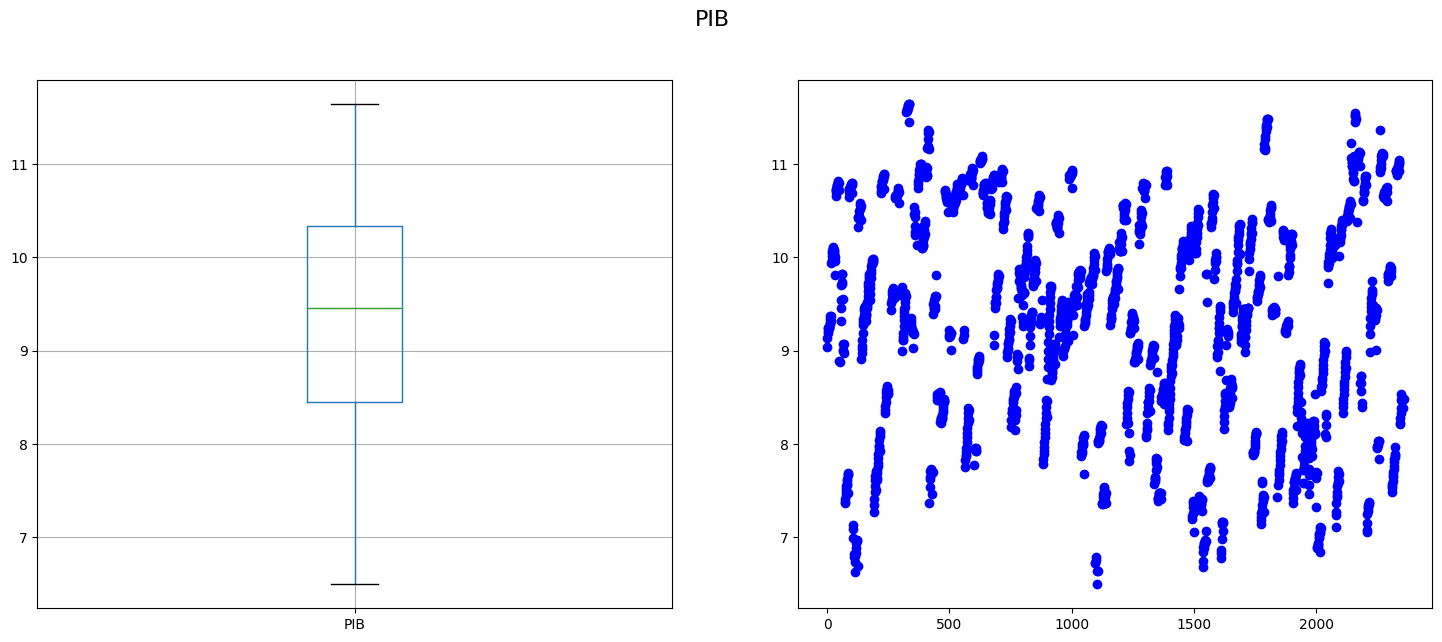

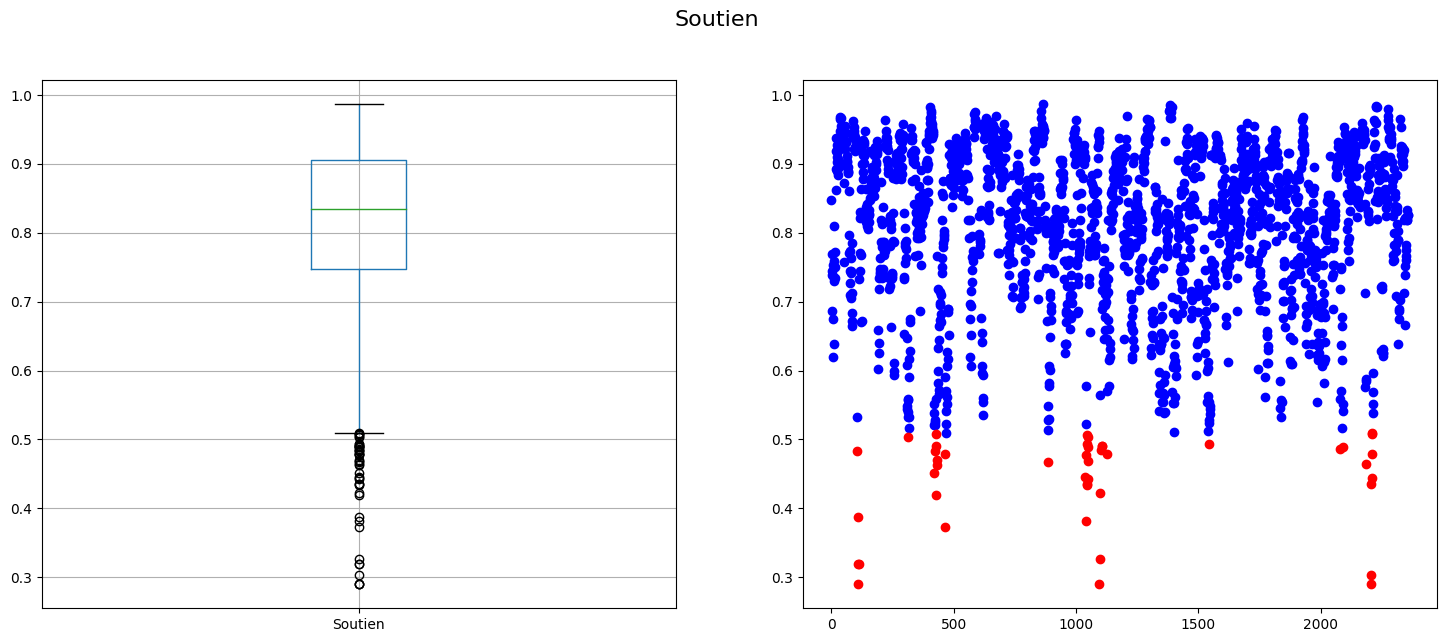

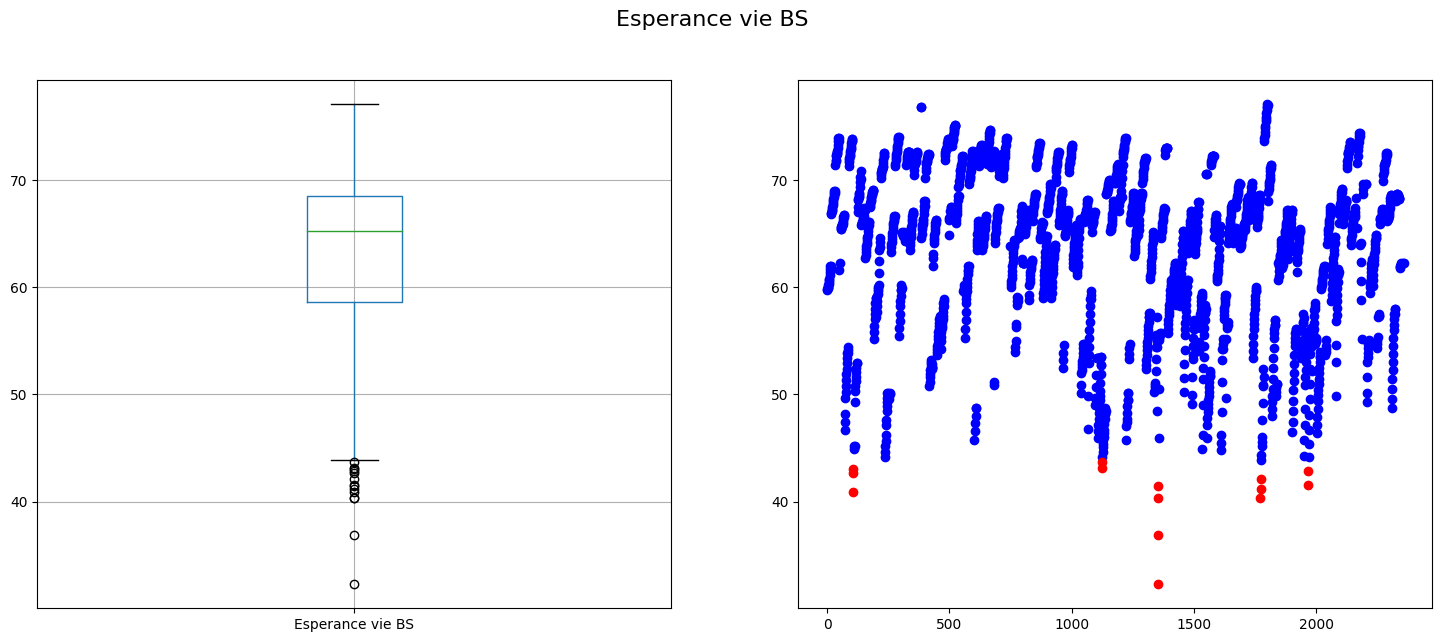

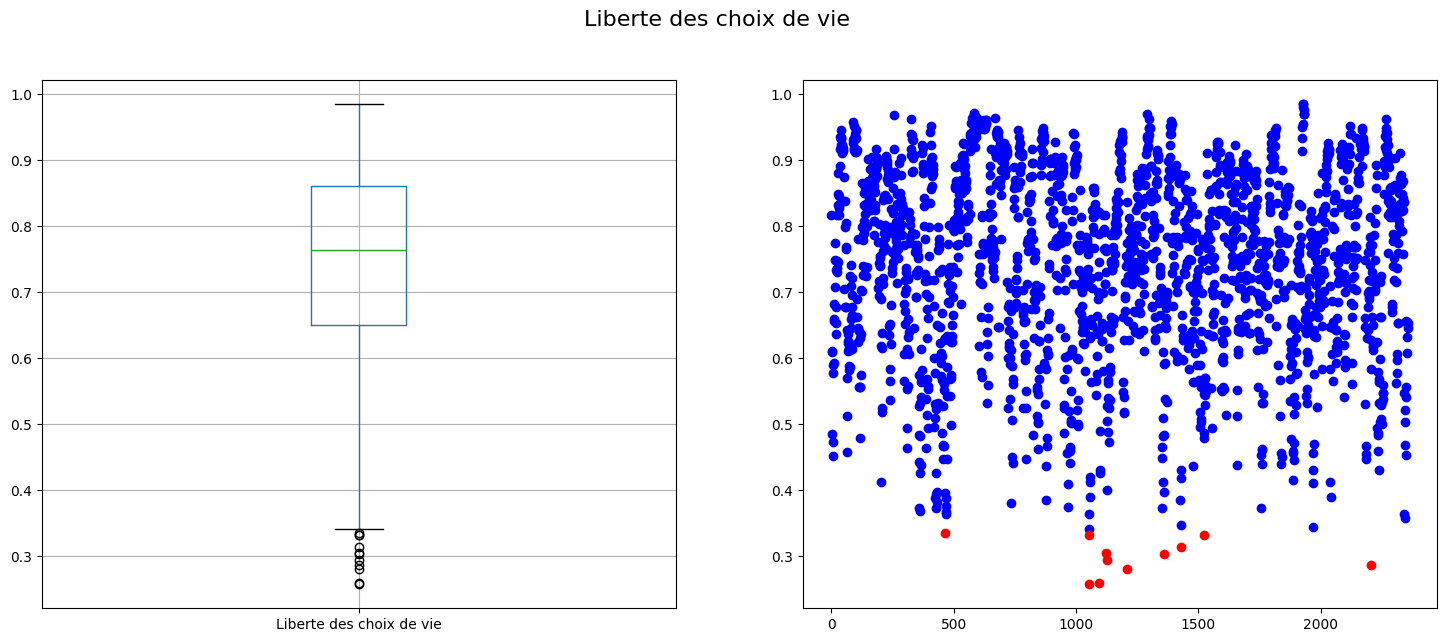

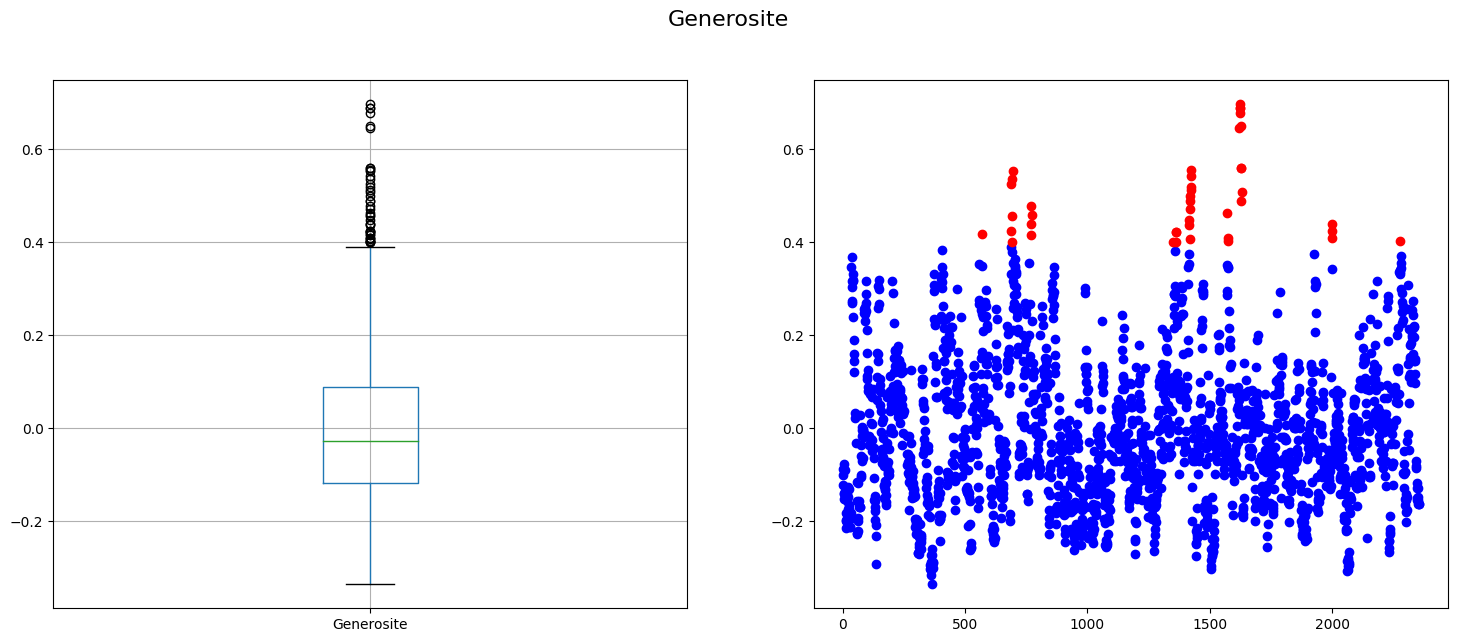

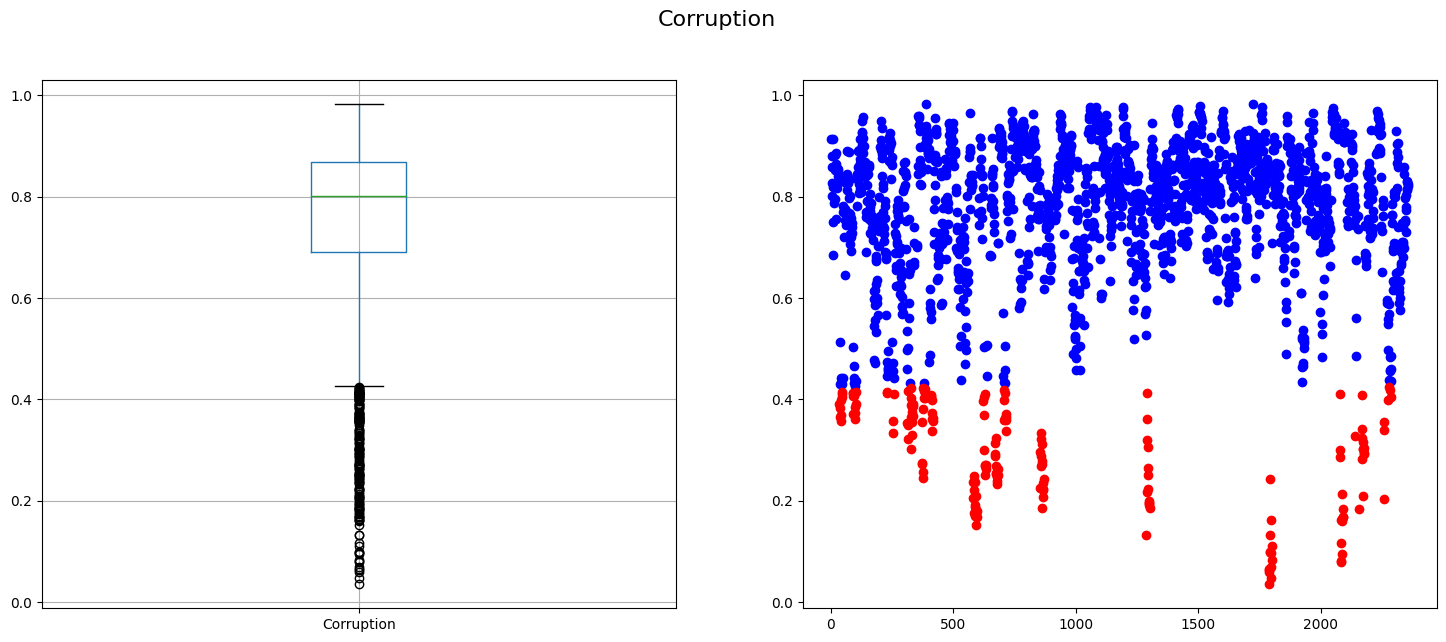

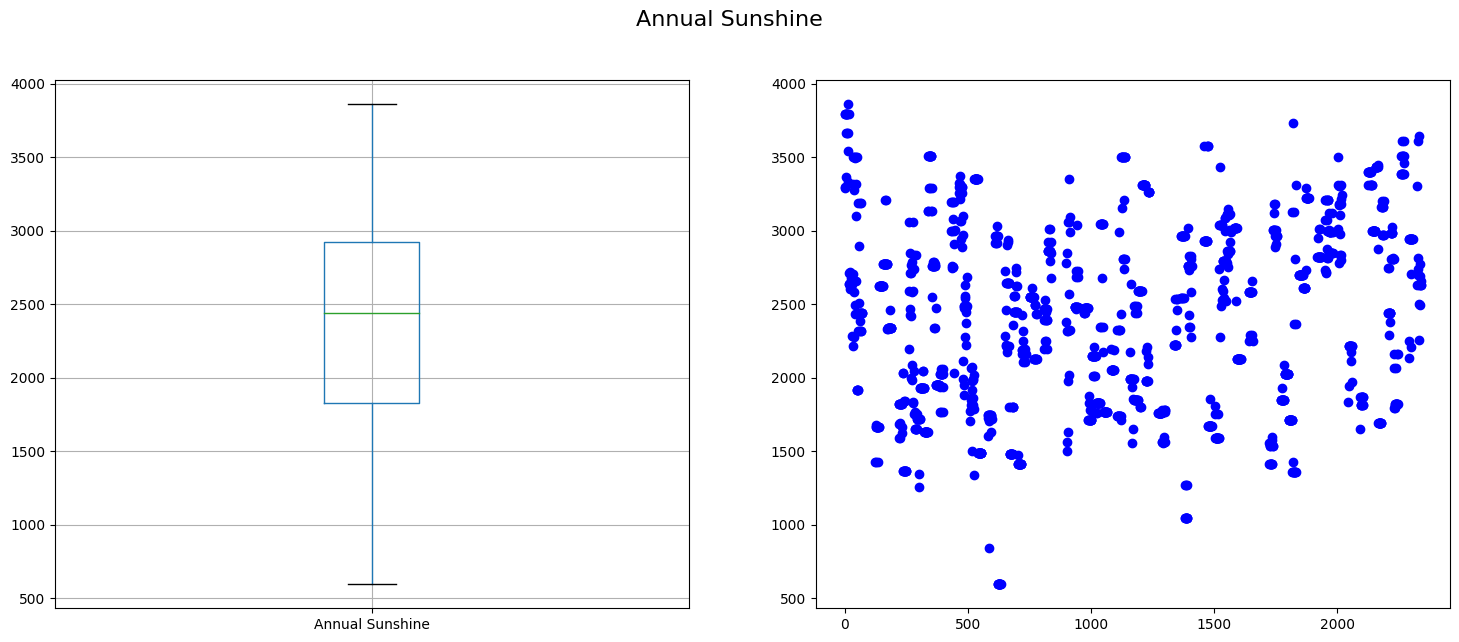

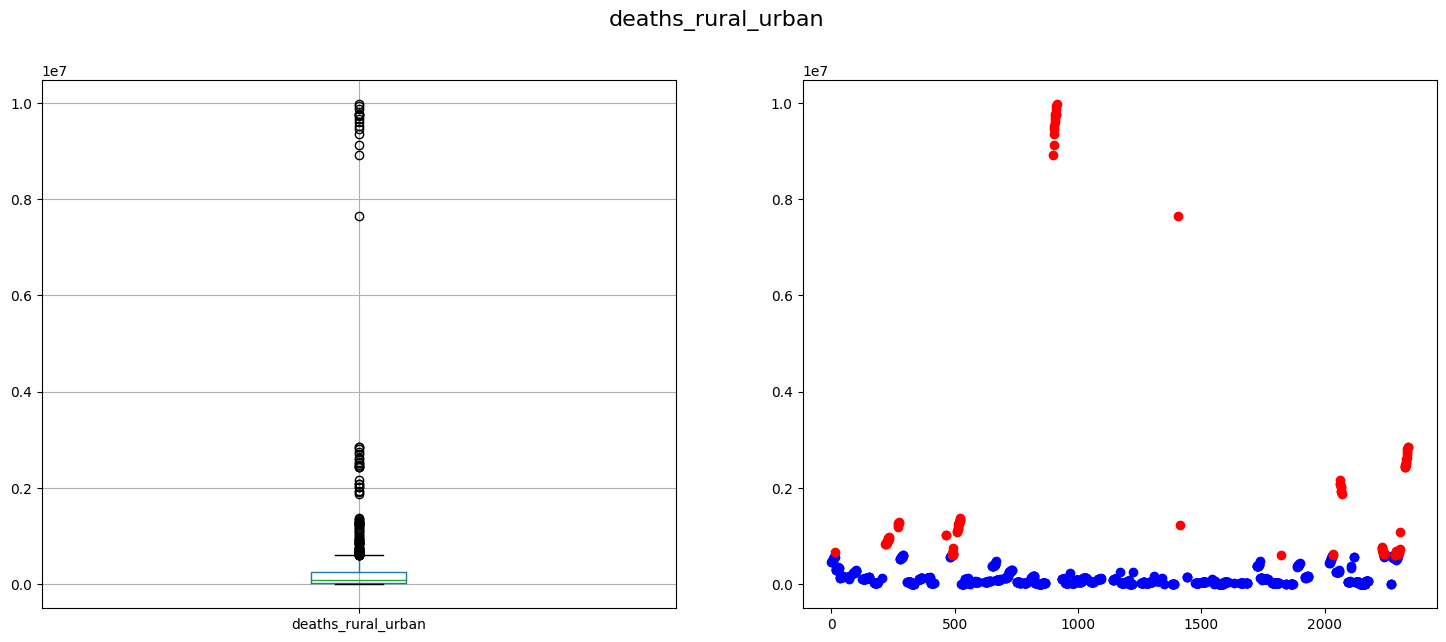

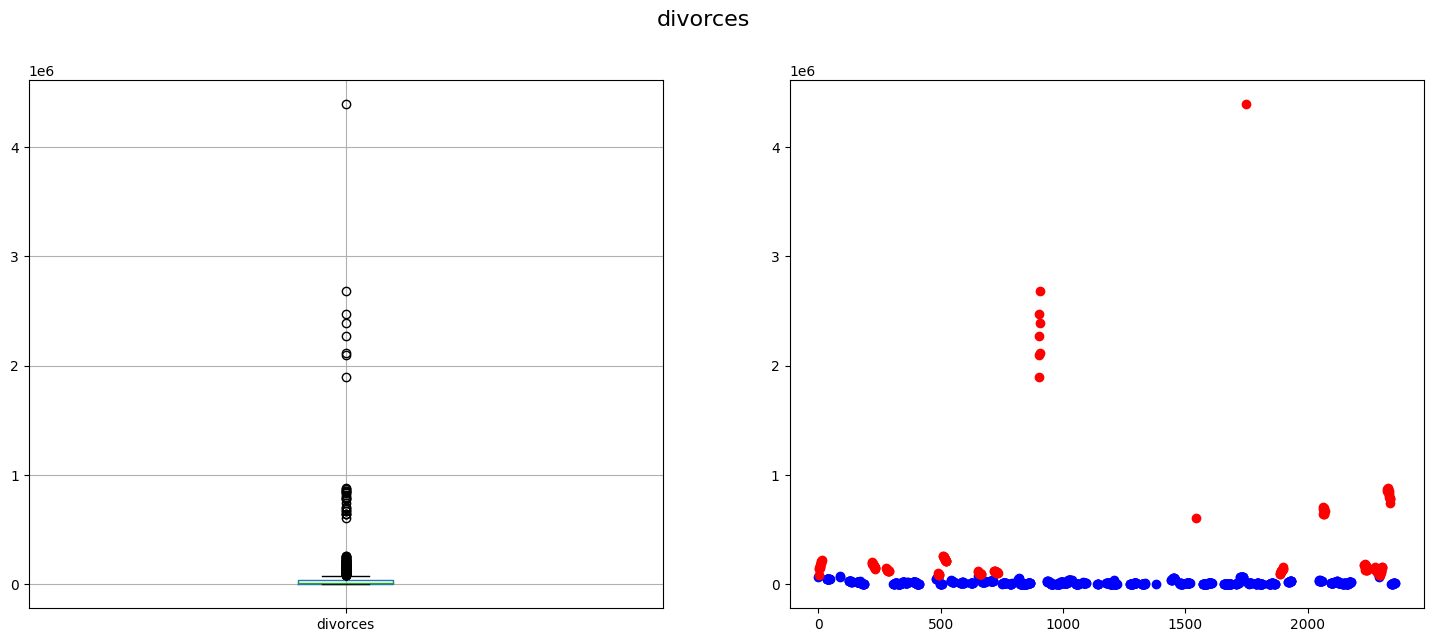

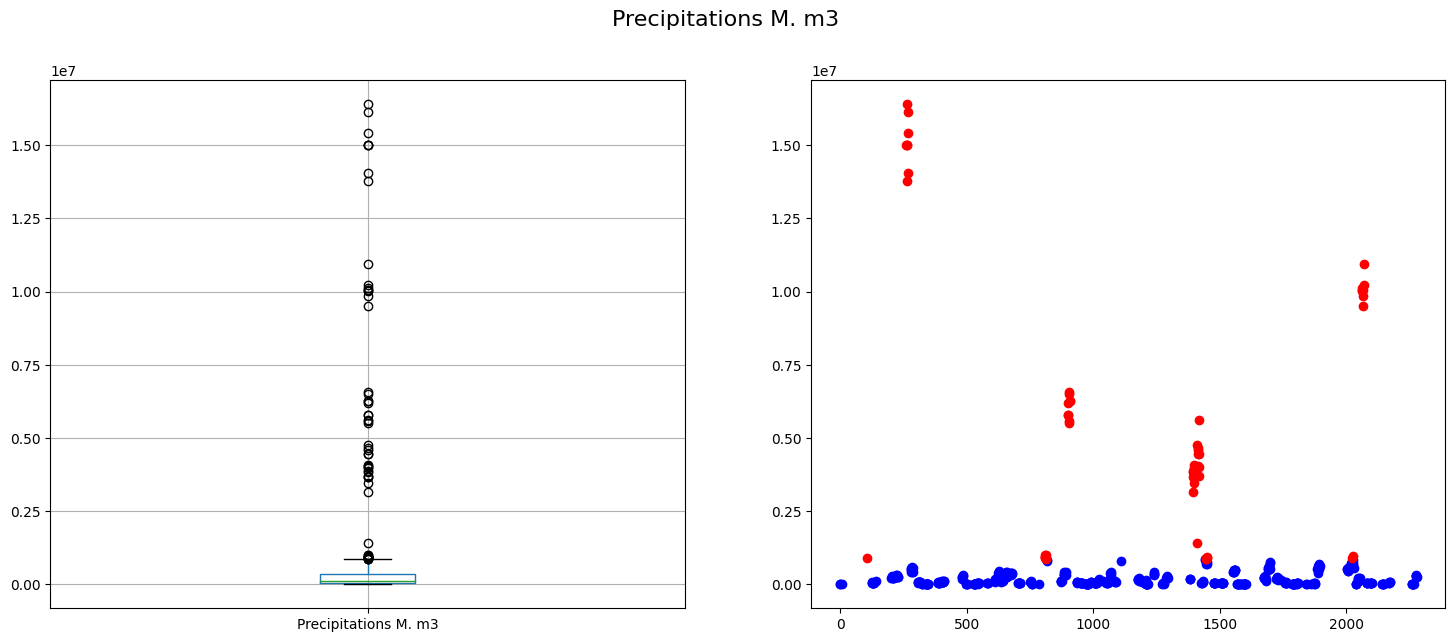

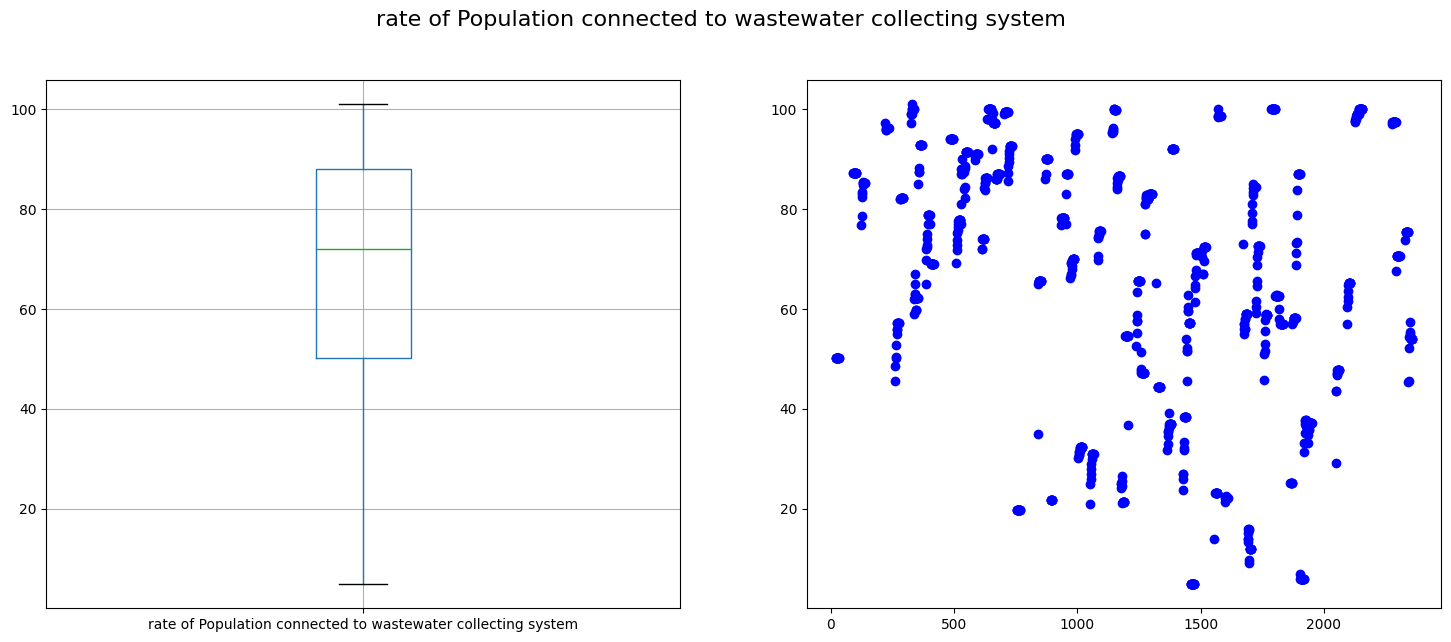

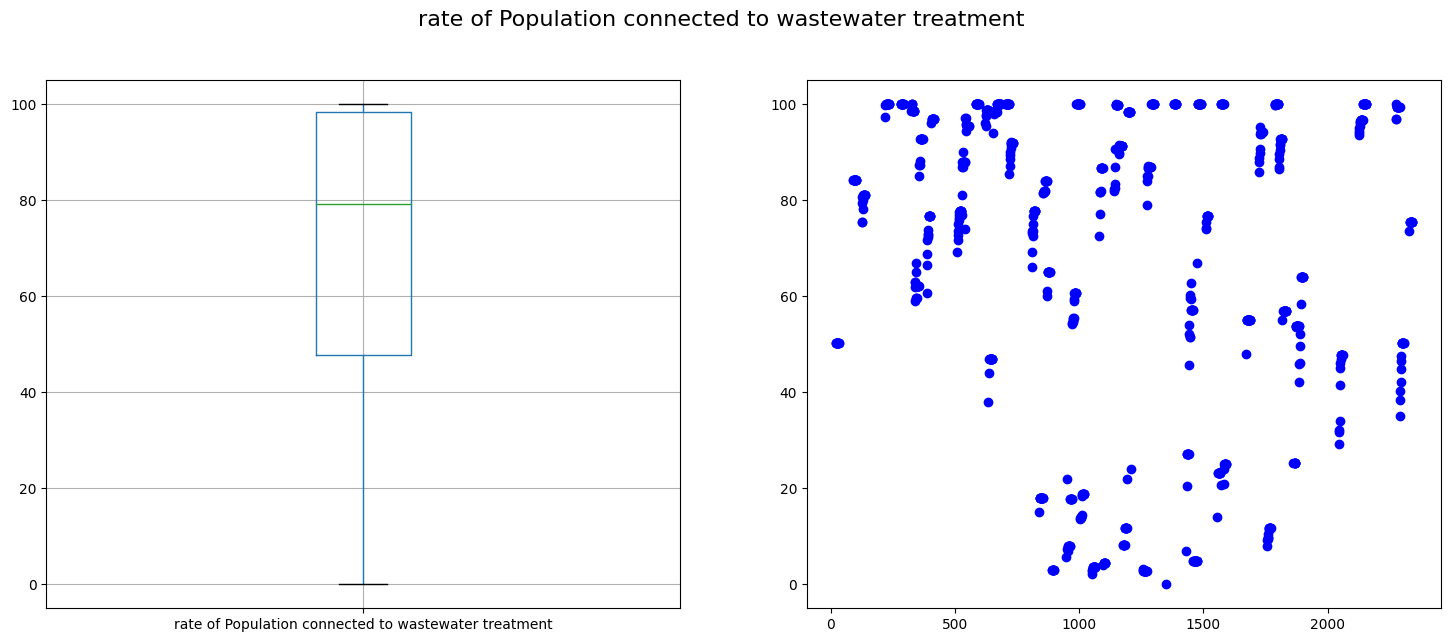

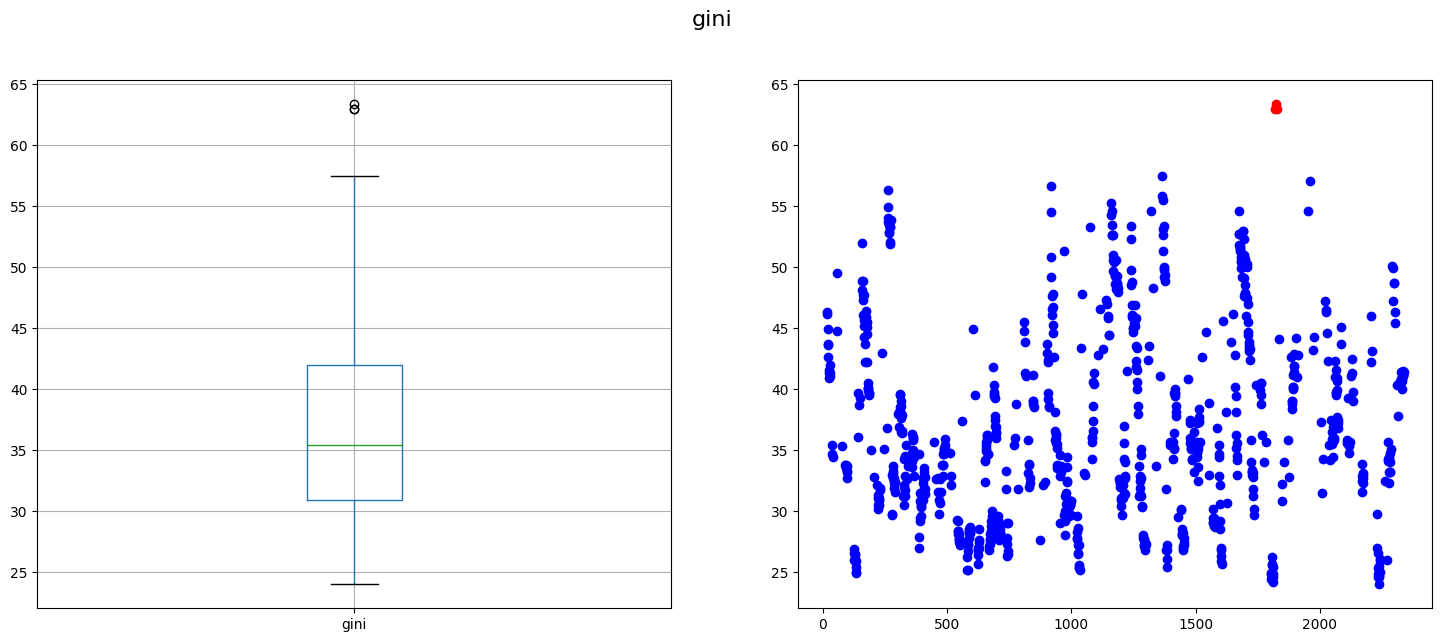

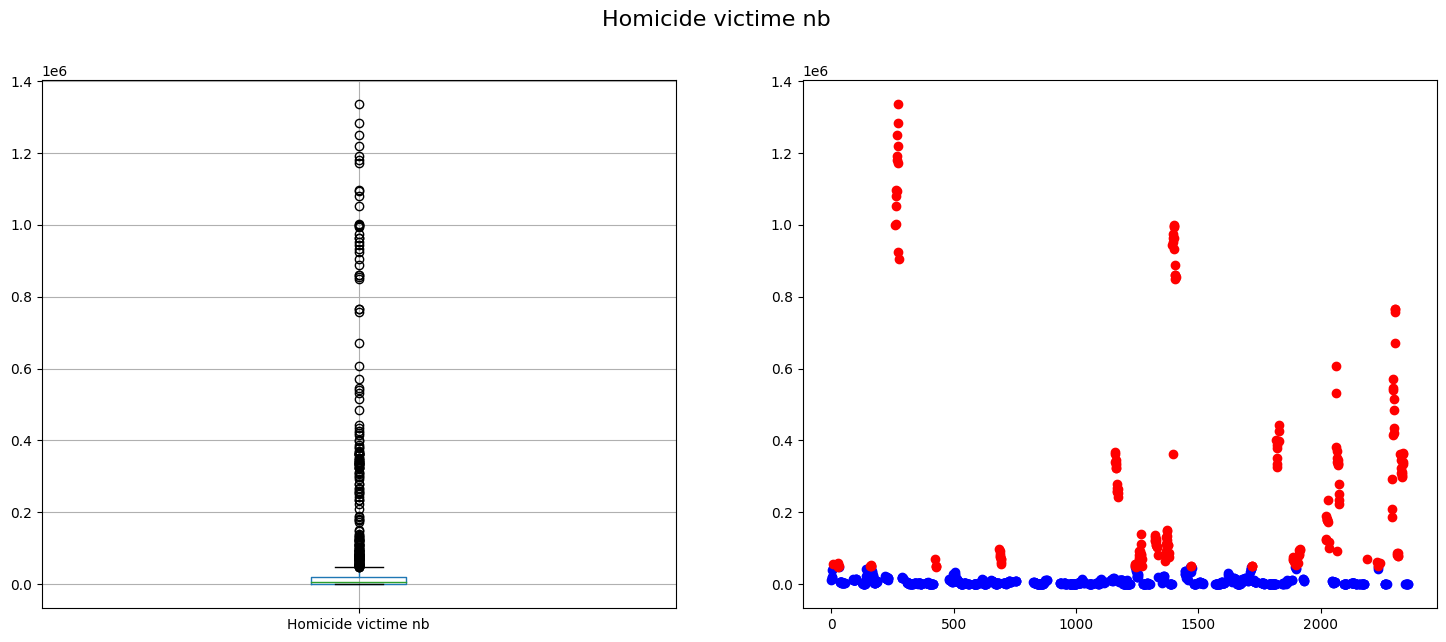

In [32]:
cols = get_numeric_columns_names(df_completed)
to_remove = ['year', 'continent_encode', 'latitude', 'longitude','id_country','continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_NA', 'continent_code_OC','continent_code_SA']
for c in to_remove:
    cols.remove(c)

for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(df_completed, column_name)
    graphe_outliers(df_completed, column_name, q_min, q_max)

Suite à une première analyse, certaines données ont été identifiées comme incohérentes :
- `espérence de vie BS` = 0 pour 2022 => les données complémentaires au score pour 2022 sont la part de la données dans le score, et non la valeur de la variable, remplacement par NaN pour 2022
- `espérence de vie BS` < 40 à Haiti en 2010 et 2011 : 
   > - Séisme de 2010 à Haïti : Le 12 janvier 2010, à 16h53, un séisme de magnitude 7 ébranle la capitale haïtienne Port-au-Prince. La secousse a duré moins de 30 secondes mais la ville n'est plus qu'un amas de ruines. Des centaines de corps gisent dans les rues.
- `espérence de vie BS` < 45 
   - à Nigeria en 2006 et 2007 :
     > - Crash d'avion fin 2005
     > - La guerre : Nigerian troops begin to pull out of Bakassi; Bakassi becomes Cameroonian territory.
     > - Terrorisme et délinquance : A pipeline explosion on the outskirts of Lagos kills about 100 people. 
     > - Chômage : The Nigerian government announces it will lay off one in five civil servants, amounting to over 33,000 jobs 
   - à Zambie en 2006 :
     > - Crash d'avion en 2005 : 13 officiers tués dans le crash d'un avion militaire
     > - Élection présidentielle zambienne de 2006
     > - 2005 February - Supreme Court rejects opposition challenge to President Mwanawasa's 2001 election victory, but says ballot had flaws.
     > - 2005 April - World Bank approves $3.8 billion debt relief package which will write off more than 50% of Zambia's debt.
     > - Around 50 workers killed in explosion at Chinese-owned explosives factory.
     > - 2005 November - President Mwanawasa declares a national disaster and appeals for food aid. He says more than a million Zambians face food shortages owing to drought.
     > - 2006 April - President Mwanawasa suffers a minor stroke. He resumes "light duties" after some weeks and later declares himself fit to run for re-election towards the end of the year.
     > - 2006 September - President Mwanawasa wins a second term.
     > - 2006 October - President announces discovery of oil in the west. 
   - à Chad en 2008 :
     > - Guerre 
   
- L'indice de `Gini` > 60 : seul 'Republic of South Africa' est concerné => gardé
- `Soutien` < 0.52 : 13 pays concernés de 2 continents (AF, AS) sur 16 années => semble cohérent
- `Liberte des choix de vie` :
  - Pakistan 2008 (pour 2007) :
     > - A state of emergency was declared by President of Pakistan Pervez Musharraf on 3 November 2007 and lasted until 15 December 2007, during which the constitution of Pakistan was suspended. When the state of emergency was declared, Musharraf controversially held both positions of President and Chief of Army Staff.
  - Bosnia and Herzegovina 2007 / 2009 / 2011 :
     > - Terrorisme
     > - Guerre
     > - 2010 : jugement des crimes de guerre / 'Corpses of more than 50 people are unearthed in Perućac lake on the border between Bosnia and Herzegovina and Serbia by investigators looking for people who were killed during the Bosnian War.'
  - Burundi : 2008
     > - The Burundian Civil War was a civil war in Burundi lasting from 1993 to 2005.
     > - De 2005 à 2008 : traitement des suites de la guerre
     > - 2009 : Période de paix
  - Cuba : 2006
     > - 2005 : Around 200 dissidents hold a public meeting, which its organizers call the first such gathering since the 1959 revolution.
     > - 2005 : Hurricane Dennis causes widespread destruction in Cuba and leaves 16 people dead. 
- `Annual Sunshine NCDC Computed`
  - L'une des valeurs du Mali n'est pas cohérente pour l'ensoleillement, pour l'année 2021 : 298.7 alors que toutes les autres années sont autour entre 2800 et 3000 => correction en mettant la moyenne de l'année précédente et de l'année suivante
  - Niger 2006, 2009, 2012, 2022 < 10 : les données sont erronées. Le Niger est entre le Mali et le Tchad, donc décision d'imputer l'ensoleillement avec la moyenne des valeurs de ces 2 pays par année.

<div style="display: flex; background-color: indigo;" >

#### 3.1.2. Histogrammes de la DF
</div>

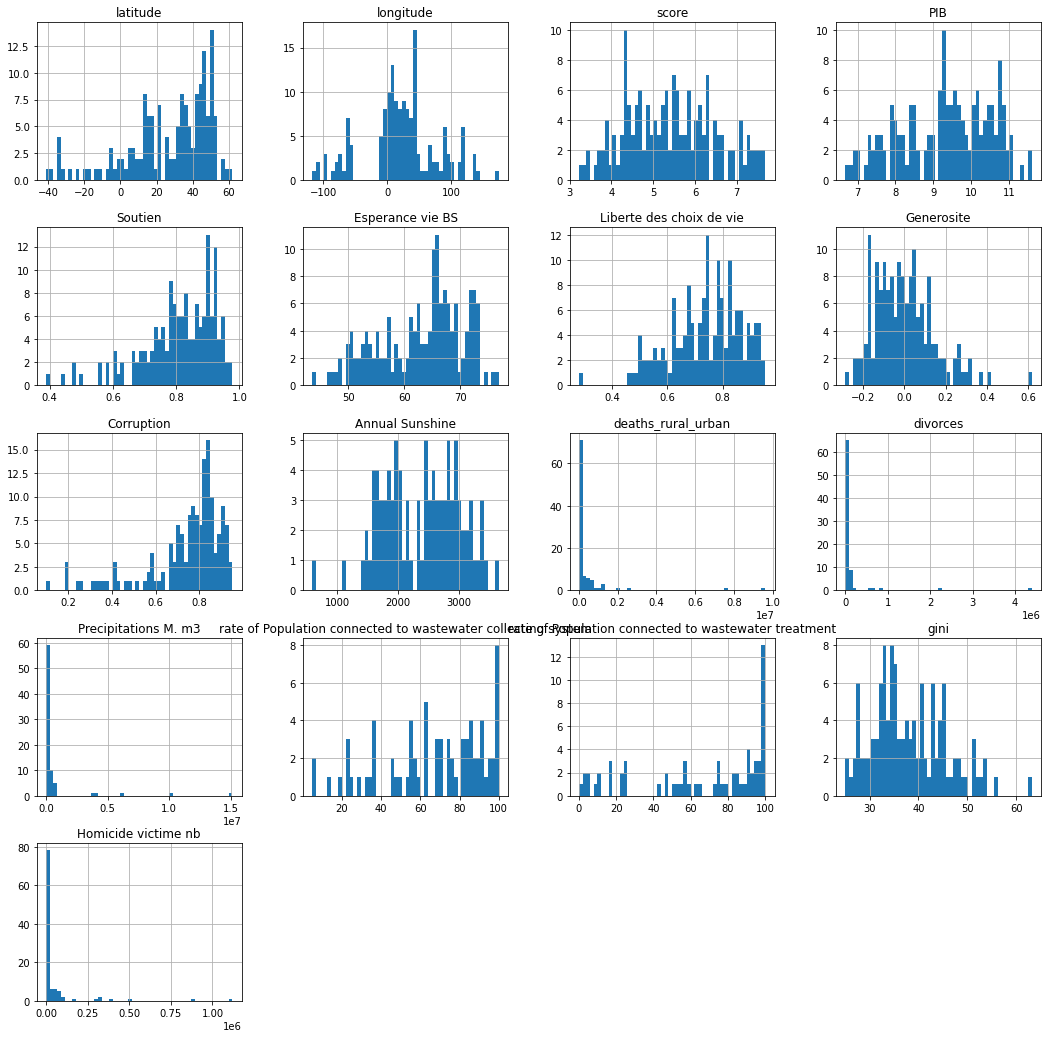

In [33]:
df_mean.hist(figsize=(18,18),bins=50)
figure.set_size_inches(18, 15, forward=True)
plt.show()

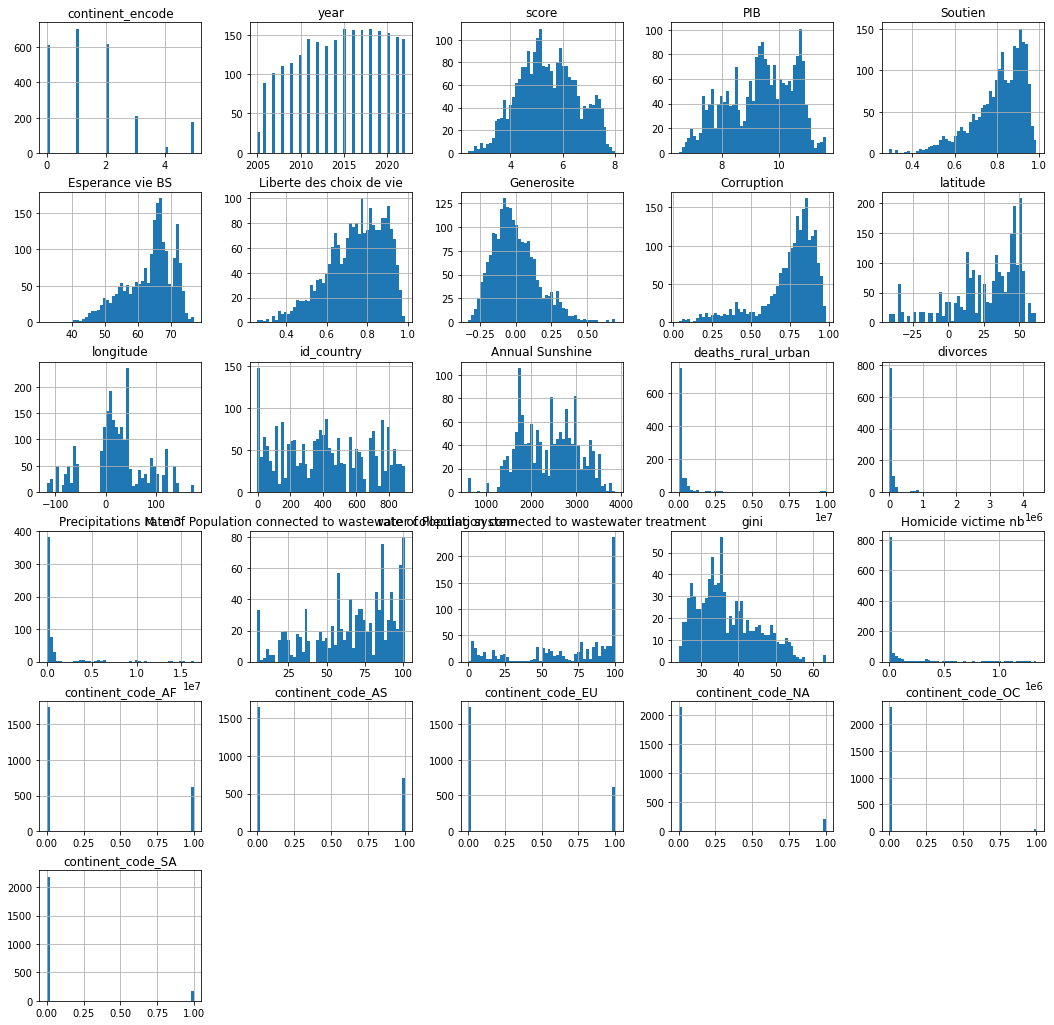

In [34]:
df_completed.hist(figsize=(18,18),bins=50)
figure.set_size_inches(18, 15, forward=True)
plt.show()

<div style="display: flex; background-color: indigo;" >

#### 3.1.3. Corrélations
</div>

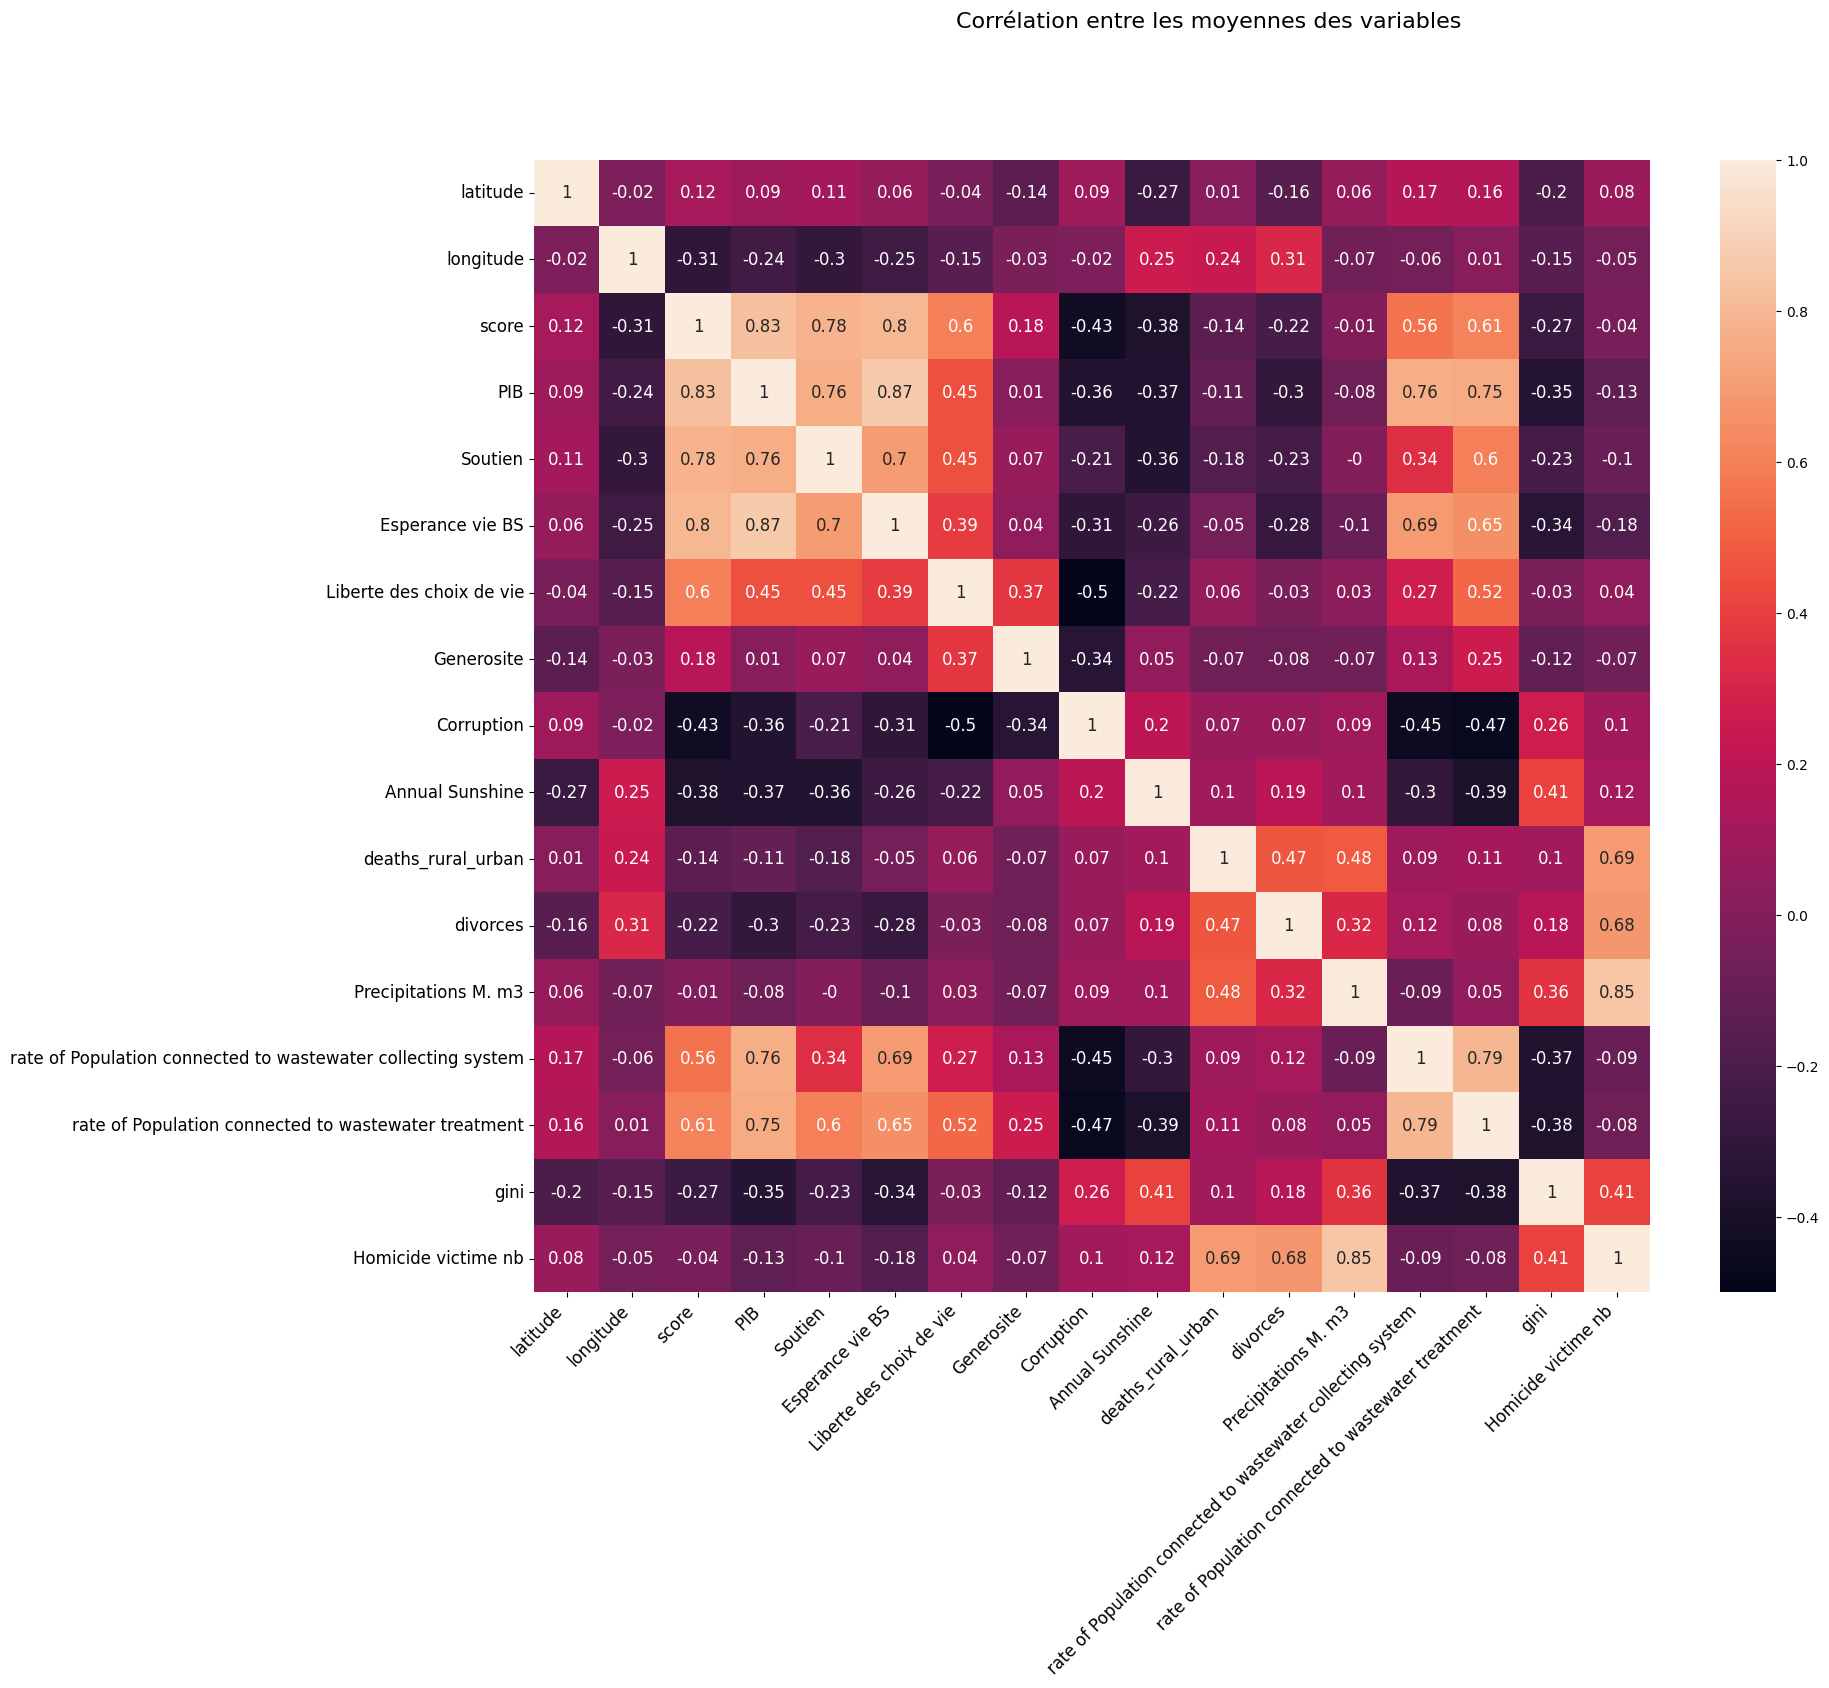

In [35]:
draw_correlation_graphe(df_mean, "Corrélation entre les moyennes des variables", verbose=verbose,fontsize=12)

On constate que les corrélations sont mieux marquées sur la df avec les moyennes des données.

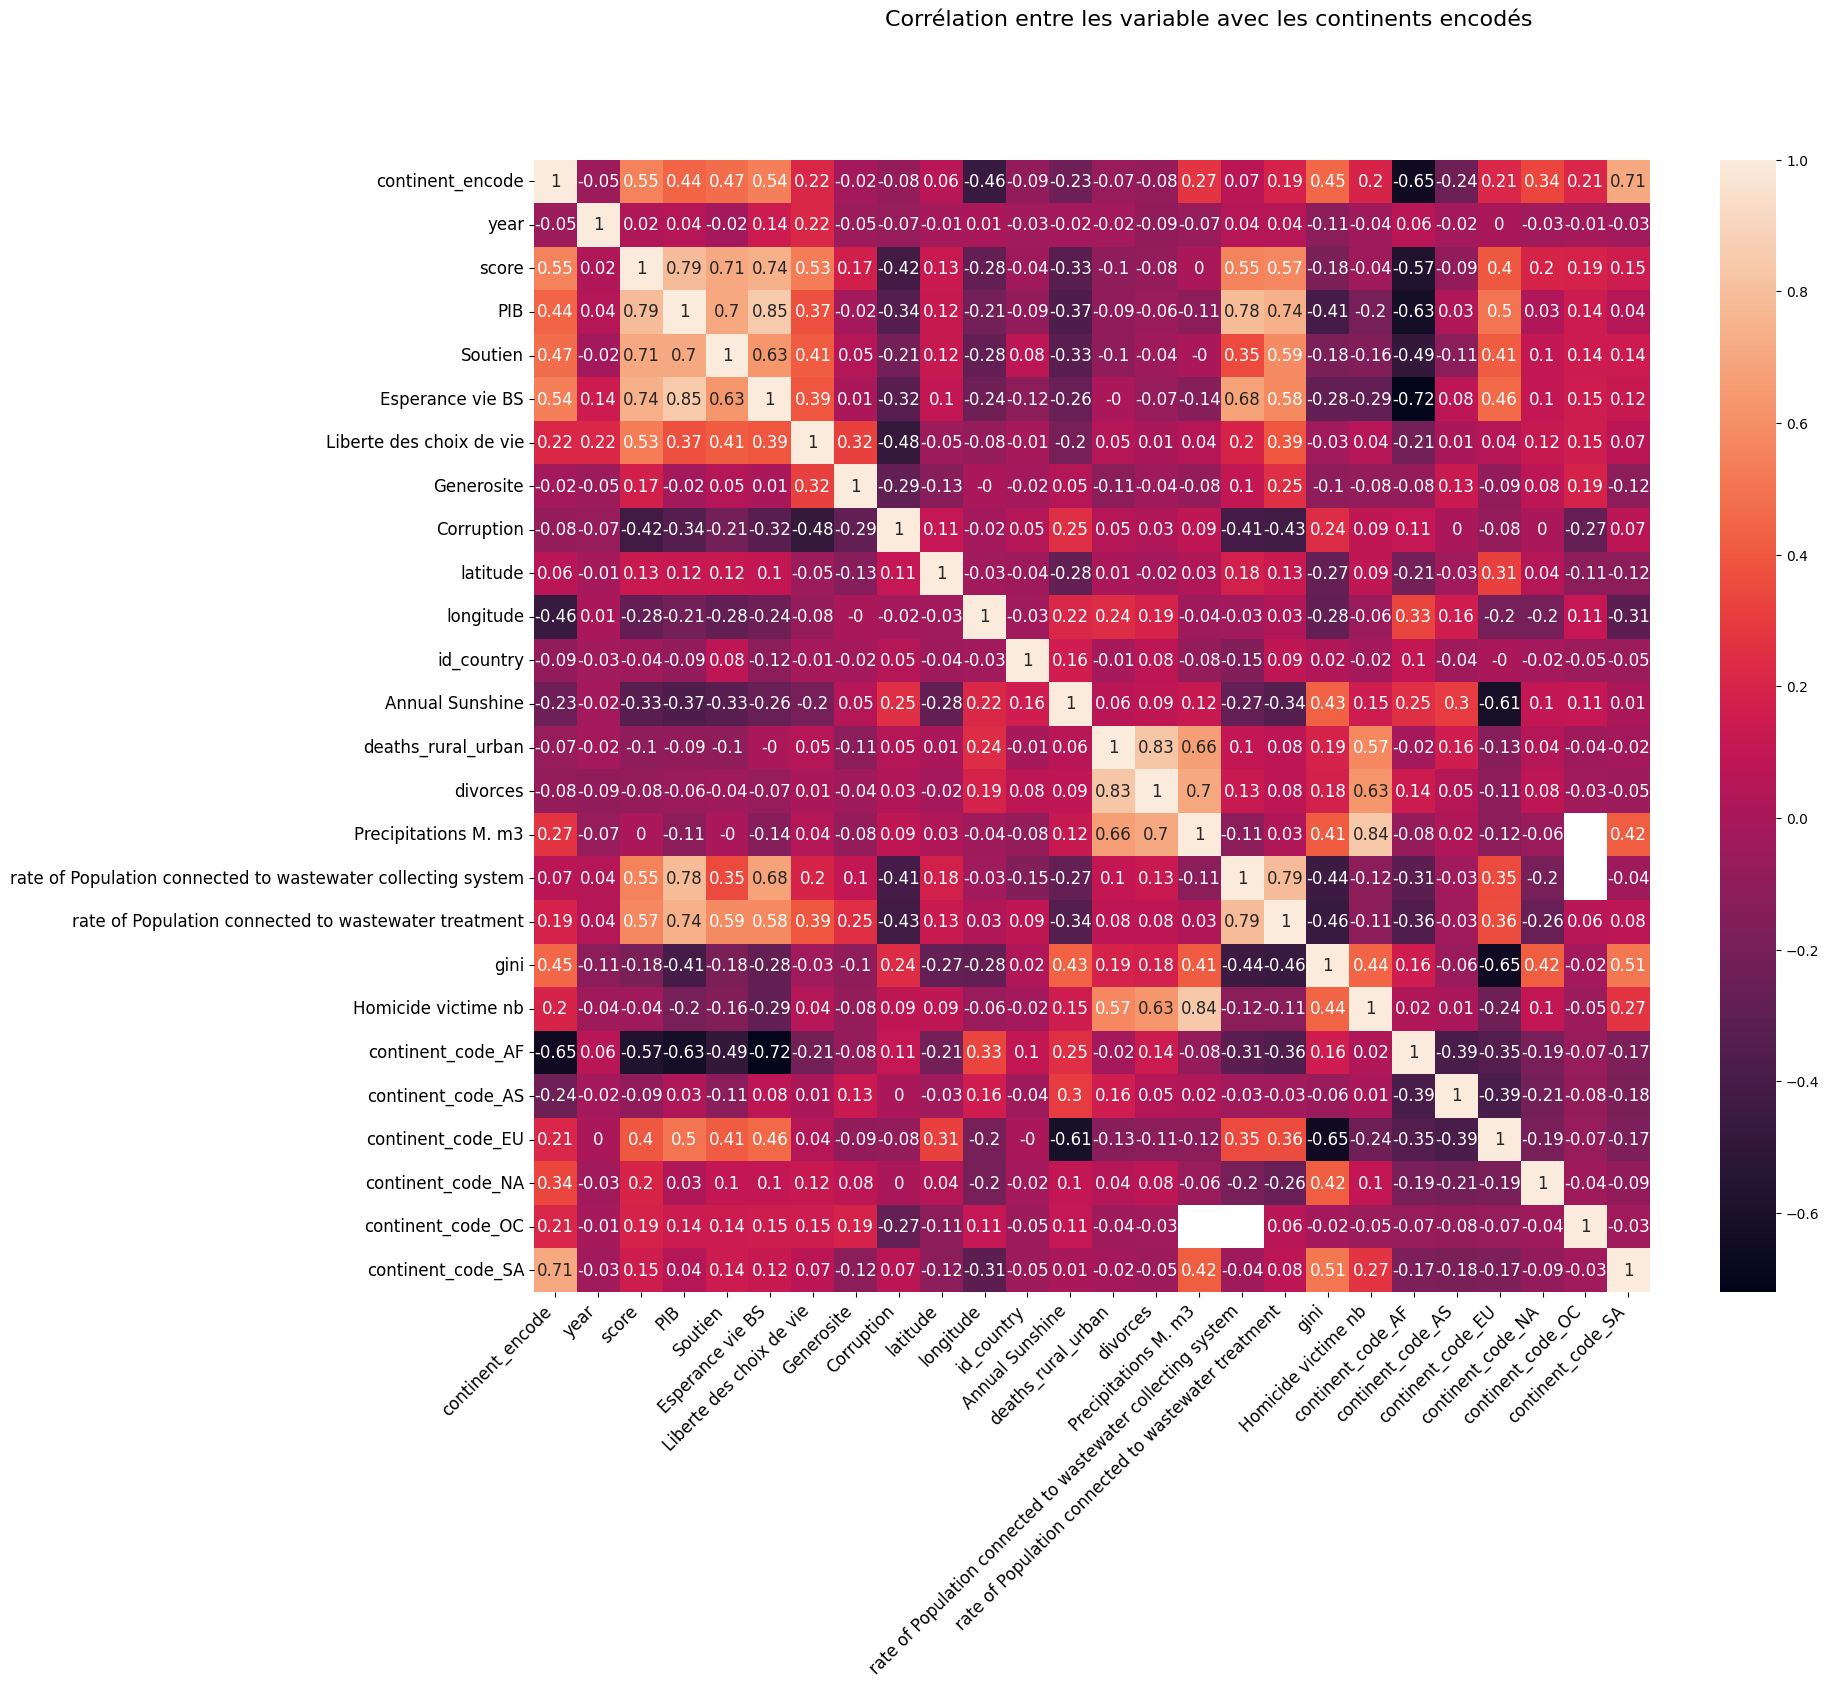

In [36]:
draw_correlation_graphe(df_completed, "Corrélation entre les variable avec les continents encodés", verbose=verbose,fontsize=12)

Fonctionnellement nous avons un préssentiment qu'il y a une corrélation entre les continents et le score.

Numériquement, l'encodage via LabelEncoder montre une corrélation, mais elle est faussée du fait qu'elle implique une comparaison possible entre les continents.

Afin d'éviter une comparaison numérique entre les pays, nous avons utilisé OneHotEncoder pour séparer les continents et éviter une comparaison, cependant ceci implique que les continents ne sont plus exclusif entre eux.

L'équivalent de la corrélation fonctionnelle est donc un mixte de ces 2 représentations, qui reste difficile à mettre en évidence.

<div style="display: flex; background-color: indigo;" >

#### 3.1.4. Paiplot de la DF
</div>

Cf. Annexe (pour éviter de le générer à chaque fois)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. Focus sur le score
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.3.1 Cartographie du score moyen des pays
</div>

In [37]:
fig = px.choropleth(df_mean, locations="alpha3",
                    color="score", # lifeExp is a column of gapminder
                    hover_name="country_official", # column to add to hover information
                    color_continuous_scale=[(0, "red"), (0.5, "yellow"), (1, "green")])
fig.update_layout(title=f"Scores moyen de {annee_min} à {annee_max}")
fig.update_layout(margin=dict(l=10, r=20, t=40, b=10))
fig.show()

> - On remarque le continent Américain (nord et sud), l'Europe et l'Australie sont les continents avec les meilleurs score.
> - Les continents Africain et Asiatique quant à eux sont très disparatres même s'ils tendent vers un score moyen voir bas.

<div style="display: flex; background-color: indigo;" >

#### 3.3.2 Evolution pour le top pays
</div>

In [38]:
score_only_by_country = df_completed[['country_official', 'continent_code', 'alpha3', 'year', 'score']].copy()

dic_year = {}

for y in range(annee_min, annee_max+1):
    score_only_by_country[y] = np.nan
    score_only_by_country.loc[score_only_by_country["year"]==y,y] = score_only_by_country["score"]
    dic_year[y] = ["sum"]
print(dic_year)

{2005: ['sum'], 2006: ['sum'], 2007: ['sum'], 2008: ['sum'], 2009: ['sum'], 2010: ['sum'], 2011: ['sum'], 2012: ['sum'], 2013: ['sum'], 2014: ['sum'], 2015: ['sum'], 2016: ['sum'], 2017: ['sum'], 2018: ['sum'], 2019: ['sum'], 2020: ['sum'], 2021: ['sum'], 2022: ['sum']}


In [39]:
# il faut fusionner les lignes par pays
score_only_by_country2 = score_only_by_country.groupby(by=['country_official', 'continent_code', 'alpha3']).agg(dic_year)
score_only_by_country2 = score_only_by_country2.droplevel(1, axis=1) 
print(score_only_by_country.shape)
print(score_only_by_country2.shape)
score_only_by_country2.head()

(2359, 23)
(164, 18)


2005   2006   2007  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     5.168  0.000  5.541   
Argentine Republic               SA             ARG     0.000  6.313  6.073   
Australia                        OC             AUS     7.341  0.000  7.285   
Belize                           NA             BLZ     0.000  0.000  6.451   
Bolivarian Republic of Venezuela SA             VEN     7.170  6.525  0.000   

                                                         2008   2009   2010  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     4.632  5.066  4.669   
Argentine Republic               SA             ARG     5.961  6.424  6.441   
Australia                        OC             AUS     7.254  0.000  7.450   
Belize                           NA             BLZ     0.000  0.000  0.000   
Bolivarian Republic of Venezuela SA             VEN     6.258  7.189  7.478   

                                                         2011   2012   2013  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     4.174  4.204  3.559   
Argentine Republic               SA             ARG     6.776  6.468  6.582   
Australia                        OC             AUS     7.406  7.196  7.364   
Belize                           NA             BLZ     0.000  0.000  0.000   
Bolivarian Republic of Venezuela SA             VEN     6.580  7.067  6.553   

                                                         2014   2015   2016  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     4.885  4.763  4.557   
Argentine Republic               SA             ARG     6.671  6.697  6.427   
Australia                        OC             AUS     7.289  7.309  7.250   
Belize                           NA             BLZ     5.956  0.000  5.956   
Bolivarian Republic of Venezuela SA             VEN     6.136  5.569  4.041   

                                                         2017   2018   2019  \
country_official                 continent_code alpha3                        
Arab Republic of Egypt           AF             EGY     3.929  4.005  4.328   
Argentine Republic               SA             ARG     6.039  5.793  6.086   
Australia                        OC             AUS     7.257  7.177  7.234   
Belize                           NA             BLZ     5.956  5.956  0.000   
Bolivarian Republic of Venezuela SA             VEN     5.071  5.006  5.081   

                                                         2020   2021   2022  
country_official                 continent_code alpha3                       
Arab Republic of Egypt           AF             EGY     4.151  4.283  4.288  
Argentine Republic               SA             ARG     5.975  5.929  5.967  
Australia                        OC             AUS     7.223  7.183  7.162  
Belize                           NA             BLZ     0.000  0.000  0.000  
Bolivarian Republic of Venezuela SA             VEN     5.053  4.892  4.925

In [40]:
# Trie des pays sur la moyenne du score
score_only_by_country2 = score_only_by_country2.reset_index()
score_only_by_country2 = score_only_by_country2.set_index('country_official')
score_only_by_country2 = score_only_by_country2.reindex(index=df_mean['country_official'])
score_only_by_country2.head()

continent_code alpha3   2005   2006   2007   2008   2009  \
country_official                                                               
Kingdom of Denmark              EU    DNK  8.019  0.000  7.834  7.971  7.683   
Republic of Finland             EU    FIN  0.000  7.672  0.000  7.671  0.000   
Swiss Confederation             EU    CHE  0.000  7.473  0.000  0.000  7.525   
Kingdom of Norway               EU    NOR  0.000  7.416  0.000  7.632  0.000   
Republic of Iceland             EU    ISL  0.000  0.000  0.000  6.888  0.000   

                      2010   2011   2012   2013   2014   2015   2016   2017  \
country_official                                                              
Kingdom of Denmark   7.771  7.788  7.520  7.589  7.508  7.514  7.558  7.594   
Republic of Finland  7.393  7.354  7.420  7.445  7.385  7.448  7.660  7.788   
Swiss Confederation  0.000  0.000  7.776  0.000  7.493  7.572  7.459  7.474   
Kingdom of Norway    0.000  0.000  7.678  0.000  7.444  7.603  7.596  7.579   
Republic of Iceland  0.000  0.000  7.591  7.501  0.000  7.498  7.510  7.476   

                      2018   2019   2020   2021   2022  
country_official                                        
Kingdom of Denmark   7.649  7.693  7.646  7.620  7.636  
Republic of Finland  7.858  7.780  7.809  7.842  7.821  
Swiss Confederation  7.509  7.694  7.560  7.571  7.512  
Kingdom of Norway    7.444  7.442  7.488  7.392  7.365  
Republic of Iceland  7.495  7.533  7.504  7.554  7.557

In [41]:
n_top = 30
score_only_by_country_t = score_only_by_country2[range(annee_min, annee_max+1)].head(n_top).T
score_only_by_country_t.head()

country_official  Kingdom of Denmark  Republic of Finland  \
2005                           8.019                0.000   
2006                           0.000                7.672   
2007                           7.834                0.000   
2008                           7.971                7.671   
2009                           7.683                0.000   

country_official  Swiss Confederation  Kingdom of Norway  Republic of Iceland  \
2005                            0.000              0.000                0.000   
2006                            7.473              7.416                0.000   
2007                            0.000              0.000                0.000   
2008                            0.000              7.632                6.888   
2009                            7.525              0.000                0.000   

country_official  Kingdom of the Netherlands  Kingdom of Sweden  Canada  \
2005                                   7.464              7.376   7.418   
2006                                   0.000              0.000   0.000   
2007                                   7.452              7.241   7.482   
2008                                   7.631              7.516   7.486   
2009                                   0.000              7.266   7.488   

country_official  New Zealand  Australia  ...  United Mexican States  \
2005                    0.000      7.341  ...                  6.581   
2006                    7.305      0.000  ...                  0.000   
2007                    7.604      7.285  ...                  6.525   
2008                    7.381      7.254  ...                  6.829   
2009                    0.000      0.000  ...                  6.963   

country_official  French Republic  Czech Republic  Republic of Panama  \
2005                        7.093           6.439               0.000   
2006                        6.583           0.000               6.128   
2007                        0.000           6.500               6.894   
2008                        7.008           0.000               6.931   
2009                        6.283           0.000               7.034   

country_official  Federative Republic of Brazil  Kingdom of Saudi Arabia  \
2005                                      6.637                    7.080   
2006                                      0.000                    0.000   
2007                                      6.321                    7.267   
2008                                      6.691                    6.811   
2009                                      7.001                    6.148   

country_official  Kingdom of Spain  Republic of Singapore  State of Qatar  \
2005                         7.153                  0.000           0.000   
2006                         0.000                  6.463           0.000   
2007                         6.995                  6.834           0.000   
2008                         7.294                  6.642           0.000   
2009                         6.199                  6.145           6.418   

country_official  Republic of Malta  
2005                          0.000  
2006                          0.000  
2007                          0.000  
2008                          0.000  
2009                          6.328  

[5 rows x 30 columns]

In [42]:
# on remplace les 0 par des nan pour éviter des chutes dans les courbes
score_only_by_country_t.replace(0, np.nan, inplace=True)

In [85]:
draw_top_score(score_only_by_country_t=score_only_by_country_t, n_top = 30, verbose=verbose)

Le top 30 représente encore trop de données, donc diminution au top 10.

In [84]:
draw_top_score(score_only_by_country_t=score_only_by_country_t, n_top = 10, verbose=verbose)

Les données sont encore peut lisible, même avec seulement le top 10.

<div style="display: flex; background-color: indigo;" >

#### 3.3.2 Evolution pour le top mais par pays
</div>

In [89]:
from plotly.subplots import make_subplots

In [208]:
def draw_top_score(score_only_by_country_t, n_top = 30, verbose=0):
    fig = px.line(score_only_by_country_t.head(n_top), markers=True, title=f"Evolution des scores du top {n_top} (sur la moyenne).")
    fig.update_layout(
        # xaxis_title="Années",
        yaxis_title="Score",
        legend_title="Nom officiel des pays",
    )
    fig.update_layout(margin=dict(l=10, r=20, t=40, b=20))
    fig.update_layout(xaxis = go.layout.XAxis( tickangle = 45) )
    fig.update_xaxes(dtick=1)
    fig.show()

In [213]:
def draw_top_by_country_score(score_only_by_country_t, n_top = 5, verbose=0):
    
    countries_names = list(score_only_by_country_t.columns)

    sub_plot_title = []
    i = 1
    for tit in countries_names[0:n_top]:
        sub_plot_title.append(str(i) + " - " + tit)
        i += 1

    years = list(score_only_by_country_t.index)
    fig = make_subplots(rows=n_top+1, cols=1, subplot_titles=tuple(sub_plot_title))
    fig.update_annotations(font_size=12)

    for i in range(0, n_top):
        y = score_only_by_country_t[countries_names[i]]
        sub_fig = go.Scatter(x=years, y=y, name = sub_plot_title[i], showlegend=False)
        fig.add_trace(sub_fig, row=i+1, col=1)

    fig.update_layout(height=200*n_top, width=1000, title_text=f"Evolution des scores pour le top {n_top} des pays")
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(nticks=10, dtick=0.1)
    fig.show()

In [214]:
draw_top_by_country_score(score_only_by_country_t=score_only_by_country_t, n_top = 5, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 3.3.2 Evolution pour la France
</div>

In [45]:
fig = px.line(score_only_by_country_t[country_official_France], markers=True, title=f"Evolution des scores pour {country_official_France}.")
fig.update_layout(
    xaxis_title="Années",
    yaxis_title="Score",
    legend_title="Nom officiel des pays",
)
fig.update_layout(margin=dict(l=10, r=20, t=40, b=10))
fig.update_xaxes(dtick=1)
fig.show()

<div style="display: flex; background-color: indigo;" >

#### 3.3.3 Evolution par continent
</div>

In [46]:
dic_year_mean = {}
for k in dic_year.keys():
    dic_year_mean[k] = ['mean']
print(dic_year_mean)

{2005: ['mean'], 2006: ['mean'], 2007: ['mean'], 2008: ['mean'], 2009: ['mean'], 2010: ['mean'], 2011: ['mean'], 2012: ['mean'], 2013: ['mean'], 2014: ['mean'], 2015: ['mean'], 2016: ['mean'], 2017: ['mean'], 2018: ['mean'], 2019: ['mean'], 2020: ['mean'], 2021: ['mean'], 2022: ['mean']}


In [47]:
# il faut fusionner les lignes par continent
score_only_by_continent = score_only_by_country.groupby(by=['continent_code']).agg(dic_year_mean)
score_only_by_continent = score_only_by_continent.droplevel(1, axis=1) 
print(score_only_by_continent.shape)
score_only_by_continent.head()

(6, 18)


2005      2006      2007      2008      2009      2010  \
continent_code                                                               
AF              5.168000  4.074182  4.435857  4.296296  4.421240  4.335615   
AS              5.804857  5.183828  5.240600  5.104833  5.313487  5.356275   
EU              6.650000  6.028375  5.761857  6.561391  5.839033  5.935029   
NA              6.999500  5.679250  6.276818  6.074167  6.636700  6.299273   
OC              7.341000  7.305000  7.444500  7.317500       NaN  7.337000   

                    2011      2012      2013      2014      2015      2016  \
continent_code                                                               
AF              4.485769  4.413412  4.088323  4.184632  4.340370  4.197636   
AS              5.358886  5.187512  5.232667  5.339214  5.279891  5.290533   
EU              5.938946  6.089325  6.003763  6.052462  6.101575  6.173425   
NA              6.068769  6.081727  6.201538  6.098462  5.979538  6.036571   
OC              7.298500  7.223000  7.322000  7.297500  7.363500  7.238000   

                    2017      2018      2019      2020      2021      2022  
continent_code                                                              
AF              4.377089  4.477326  4.441422  4.433818  4.539675  4.527625  
AS              5.264311  5.246304  5.334067  5.302372  5.335814  5.334548  
EU              6.267575  6.385625  6.423375  6.361775  6.421313  6.469450  
NA              6.231214  6.122214  6.187000  6.184000  6.123000  6.288818  
OC              7.292000  7.273500  7.219500  7.261500  7.230000  7.181000

In [48]:
score_only_by_continent_t = score_only_by_continent[range(annee_min, annee_max+1)].T
# on remplace les 0 par des nan pour éviter des chutes dans les courbes
score_only_by_continent_t.replace(0, np.nan, inplace=True)
score_only_by_continent_t.head()

continent_code        AF        AS        EU        NA      OC        SA
2005            5.168000  5.804857  6.650000  6.999500  7.3410  6.903500
2006            4.074182  5.183828  6.028375  5.679250  7.3050  5.627889
2007            4.435857  5.240600  5.761857  6.276818  7.4445  5.702700
2008            4.296296  5.104833  6.561391  6.074167  7.3175  5.782500
2009            4.421240  5.313487  5.839033  6.636700     NaN  6.287900

In [50]:
fig = px.line(score_only_by_continent_t, markers=True, title=f"Evolution des scores par continent.")
fig.update_layout(
    xaxis_title="Années",
    yaxis_title="Score",
    legend_title="Code continent",
)
fig.update_layout(margin=dict(l=10, r=20, t=40, b=10))
fig.update_xaxes(dtick=1)
fig.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 4.Clustering
</div>

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [52]:
random_state=42

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.1. Standardisation
</div>

In [56]:
df_completed.columns

Index(['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'Regional indicator', 'alpha3', 'alpha2', 'latitude', 'longitude',
       'id_country', 'Annual Sunshine', 'deaths_rural_urban', 'divorces',
       'Precipitations M. m3',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb', 'continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_NA', 'continent_code_OC',
       'continent_code_SA'],
      dtype='object')

In [59]:
df_numeric = df_completed[['continent_encode',
       'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'latitude', 'longitude',
       'Annual Sunshine', 'deaths_rural_urban', 'divorces',
       'Precipitations M. m3',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb', 'continent_code_AF', 'continent_code_AS',
       'continent_code_EU', 'continent_code_NA', 'continent_code_OC',
       'continent_code_SA']]

In [60]:
# Standardisation des features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. Modélisation
</div>

In [61]:
n_clusters=3
n_init=10
max_iter=300

In [62]:
kmeans = KMeans(
    init="random",
    n_clusters=n_clusters,
    n_init=n_init,
    max_iter=max_iter,
    random_state=random_state
)

In [63]:
kmeans.fit(scaled_features)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# The lowest SSE value
kmeans.inertia_

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

In [ ]:
kmeans.labels_[:5]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.3. Choosing the Appropriate Number of Clusters
</div>

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": n_init,
    "max_iter": max_iter,
    "random_state": random_state,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)

# Fit the algorithms to the features
kmeans.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
kmeans_silhouette

In [ ]:
# Plot the data and cluster silhouette comparison
fig, ax1 = plt.subplots(
    1, 1, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.3. Pipeline
</div>

In [ ]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=3, random_state=random_state)),
    ]
)

In [ ]:
clusterer = Pipeline(
   [
       ("kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=n_init,
               max_iter=max_iter,
               random_state=random_state,
           ),
       ),
   ]
)

In [ ]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [ ]:
pipe.fit(df_completed)

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(df_completed)

In [ ]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [ ]:
silhouette_score(preprocessed_data, predicted_labels)

In [ ]:
# adjusted_rand_score(true_labels, predicted_labels)

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(df_completed),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### Tuning a K-Means Clustering Pipeline
</div>

In [ ]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(df_completed)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(df_completed),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Annexes
</div>

In [ ]:
just to fail

<div style="display: flex; background-color: Green; padding: 7px;" >

### Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### EDA
</div>

<div style="display: flex; background-color: indigo;" >

#### 3.1.4. Paiplot de la DF
</div>

In [ ]:
# pour éviter de lancer la génération des paiplot par erreur
# Just to fail

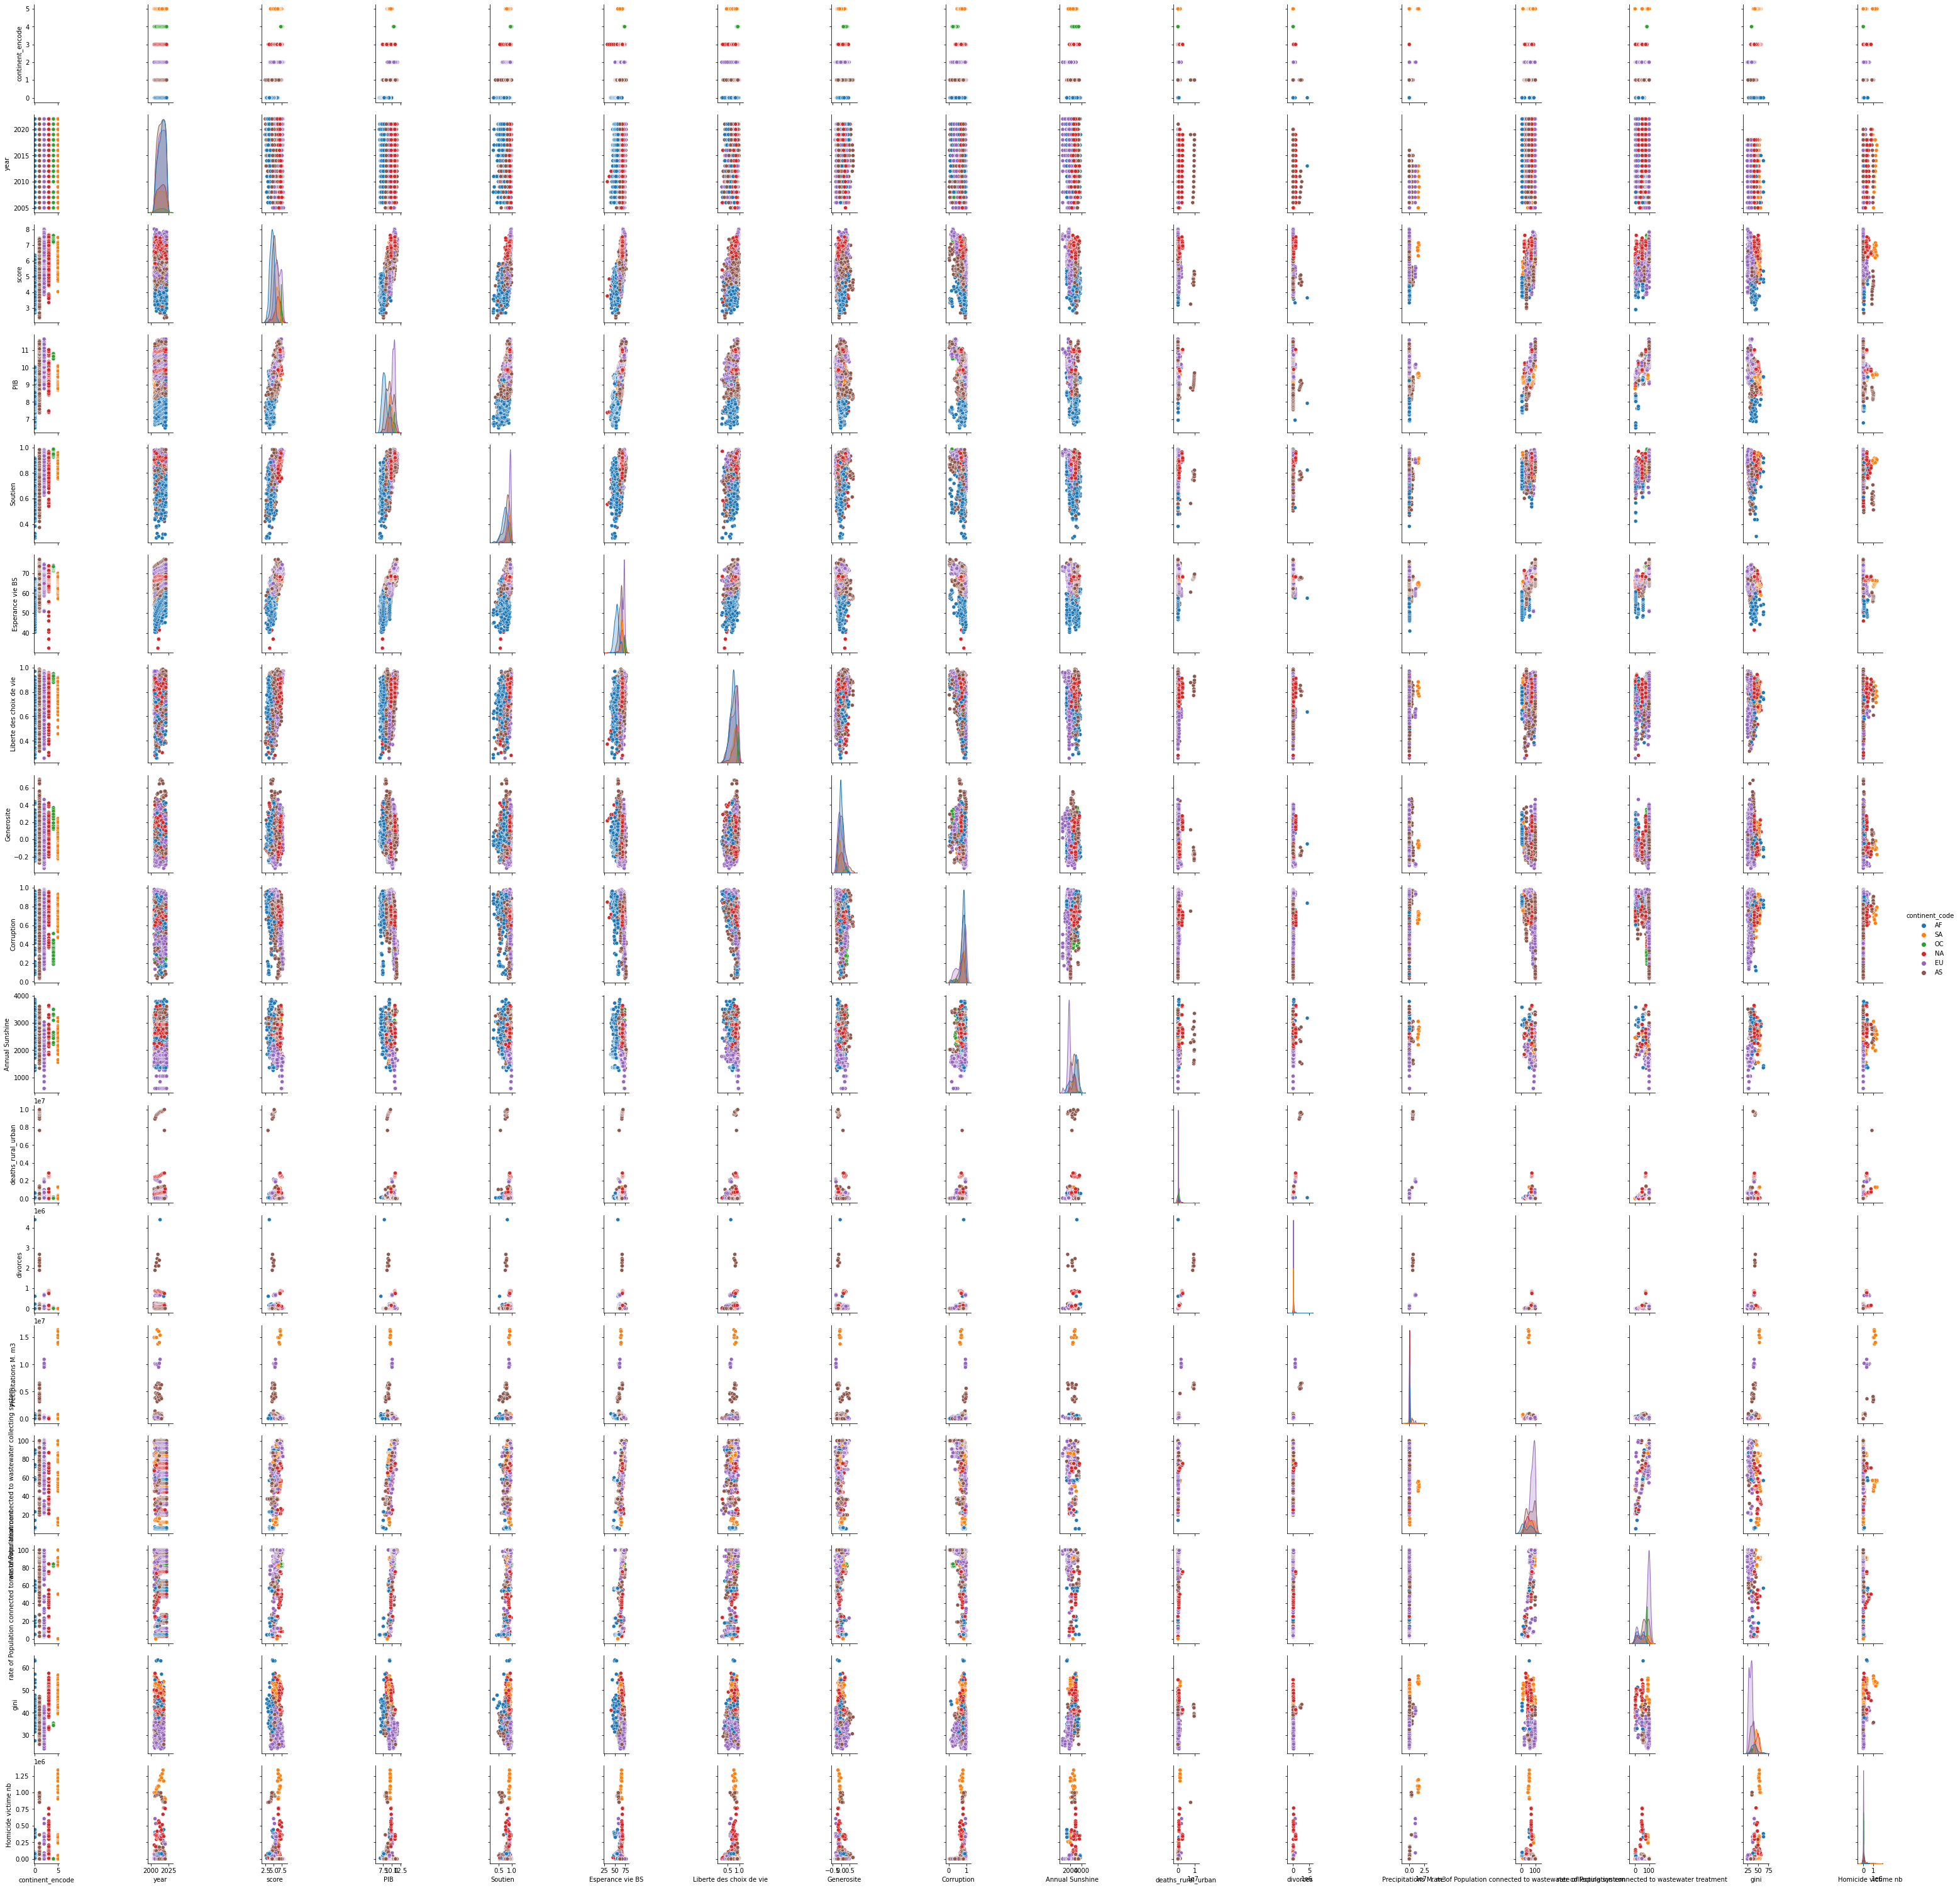

In [ ]:
sns.pairplot(df_completed[['country_official', 'country', 'continent_code', 'continent_encode',
       'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS',
       'Liberte des choix de vie', 'Generosite', 'Corruption',
       'Annual Sunshine', 'deaths_rural_urban', 'divorces',
       'Precipitations M. m3',
       'rate of Population connected to wastewater collecting system',
       'rate of Population connected to wastewater treatment', 'gini',
       'Homicide victime nb']], hue='continent_code')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()